# OBLIGATORIO BIG DATA

## Sistema de análisis de información de compañías bajo Big data

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("companies_analysis").getOrCreate()

In [2]:
from pyspark.sql.types import  (StructType, 
                                StructField, 
                                DateType, 
                                BooleanType,
                                DoubleType,
                                IntegerType,
                                StringType,
                               TimestampType)
from pyspark.sql.functions import col, max, min

In [3]:
import seaborn as sns 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings

Creamos el dataframe de compañías

In [4]:
companies = spark.read.csv("companies_sorted.csv", header = True) 

Vemos cuántos registros tiene

In [5]:
print(" The companies dataframe has {} records".format(companies.count()))

 The companies dataframe has 7173419 records


Vemos las columnas

In [6]:
companies.columns

['id',
 'name',
 'domain',
 'year founded',
 'industry',
 'size range',
 'locality',
 'country',
 'linkedin url',
 'current employee estimate',
 'total employee estimate']

In [7]:
# Casteo de datos

In [8]:
companies.dtypes

[('id', 'string'),
 ('name', 'string'),
 ('domain', 'string'),
 ('year founded', 'string'),
 ('industry', 'string'),
 ('size range', 'string'),
 ('locality', 'string'),
 ('country', 'string'),
 ('linkedin url', 'string'),
 ('current employee estimate', 'string'),
 ('total employee estimate', 'string')]

In [9]:
companies = companies.withColumn('id', (companies.id).cast('Integer'))\
                     .withColumn("year founded", (col("year founded").cast('Integer')))\
                     .withColumn("current employee estimate", (col("current employee estimate").cast('Integer')))\
                     .withColumn("total employee estimate", (col("total employee estimate").cast('Integer')))\


In [10]:
companies.dtypes

[('id', 'int'),
 ('name', 'string'),
 ('domain', 'string'),
 ('year founded', 'int'),
 ('industry', 'string'),
 ('size range', 'string'),
 ('locality', 'string'),
 ('country', 'string'),
 ('linkedin url', 'string'),
 ('current employee estimate', 'int'),
 ('total employee estimate', 'int')]

In [11]:
companies.select("size range").show(10, truncate = False)

+----------+
|size range|
+----------+
|10001+    |
|10001+    |
|10001+    |
|10001+    |
|10001+    |
|10001+    |
|10001+    |
|10001+    |
|10001+    |
|10001+    |
+----------+
only showing top 10 rows



In [12]:
companies.printSchema() #comprobamos los cambios

root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- domain: string (nullable = true)
 |-- year founded: integer (nullable = true)
 |-- industry: string (nullable = true)
 |-- size range: string (nullable = true)
 |-- locality: string (nullable = true)
 |-- country: string (nullable = true)
 |-- linkedin url: string (nullable = true)
 |-- current employee estimate: integer (nullable = true)
 |-- total employee estimate: integer (nullable = true)



## Ingeniería de atributos

In [13]:
companies_limited = companies.limit(1000000)
companies_pandas = companies_limited.toPandas() #Creamos este dataframe pandas para mejor visualización de datos

In [14]:
companies_pandas

,id,name,domain,year founded,industry,size range,locality,country,linkedin url,current employee estimate,total employee estimate
0,5872184,ibm,ibm.com,1911.0,information technology and services,10001+,"new york, new york, united states",united states,linkedin.com/company/ibm,274047,716906
1,4425416,tata consultancy services,tcs.com,1968.0,information technology and services,10001+,"bombay, maharashtra, india",india,linkedin.com/company/tata-consultancy-services,190771,341369
2,21074,accenture,accenture.com,1989.0,information technology and services,10001+,"dublin, dublin, ireland",ireland,linkedin.com/company/accenture,190689,455768
3,2309813,us army,goarmy.com,1800.0,military,10001+,"alexandria, virginia, united states",united states,linkedin.com/company/us-army,162163,445958
4,1558607,ey,ey.com,1989.0,accounting,10001+,"london, greater london, united kingdom",united kingdom,linkedin.com/company/ernstandyoung,158363,428960
5,3844889,hewlett-packard,hpe.com,1939.0,information technology and services,10001+,"palo alto, california, united states",united states,linkedin.com/company/hewlett-packard-enterprise,127952,412952
6,2959148,cognizant technology solutions,cognizant.com,1994.0,information technology and services,10001+,"teaneck, new jersey, united states",united states,linkedin.com/company/cognizant,122031,210020
7,5944912,walmart,walmartcareers.com,1962.0,retail,10001+,"withee, wisconsin, united states",united states,linkedin.com/company/walmart,120753,272827
8,3727010,microsoft,microsoft.com,1975.0,computer software,10001+,"redmond, washington, united states",united states,linkedin.com/company/microsoft,116196,276983
9,3300741,at&t,att.com,1876.0,telecommunications,10001+,"dallas, texas, united states",united states,linkedin.com/company/at&t,115188,269659


In [15]:
companies_pandas.describe() #vemos la descripción estadística de los datos numéricos

,id,year founded,current employee estimate,total employee estimate
count,1.000000e+06,669313.000000,1000000.000000,1000000.000000
mean,3.582905e+06,1988.361762,89.463195,207.210511
std,2.072636e+06,30.351703,946.201613,2333.596528
min,1.600000e+01,1451.000000,8.000000,8.000000
25%,1.785064e+06,1982.000000,11.000000,22.000000
50%,3.580350e+06,1998.000000,18.000000,41.000000
75%,5.379693e+06,2008.000000,41.000000,97.000000
max,7.173415e+06,2029.000000,274047.000000,716906.000000


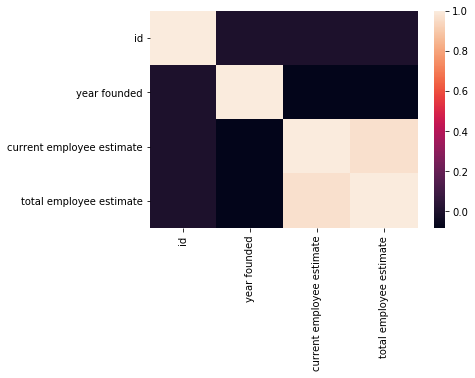

In [16]:
#hacemos un mapa de calor para ver las correlaciones entre los atributos que tenemos
corr = companies_pandas.corr() 
sns.heatmap(corr, 
      xticklabels=corr.columns.values, 
      yticklabels=corr.columns.values) 

In [17]:
#Otra forma de ver la correlación, no solo con colores sino con los valores de cada correlación.

cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,id,year founded,current employee estimate,total employee estimate
id,1,-0.0014,-0.00063,-0.00083
year founded,-0.0014,1,-0.082,-0.084
current employee estimate,-0.00063,-0.082,1,0.97
total employee estimate,-0.00083,-0.084,0.97,1


Vemos que las columnas "total employee estimate" y "current employee estimate" están muy relacionadas. Por lo tanto, nos quedamos solamente con la segunda columna.

In [18]:
companies = companies.drop(col("total employee estimate"))

In [19]:
# También borramos la columna id porque no aporta info
companies = companies.drop(col("id"))

In [20]:
companies.columns

['name',
 'domain',
 'year founded',
 'industry',
 'size range',
 'locality',
 'country',
 'linkedin url',
 'current employee estimate']

## Consultas

### Determinar cuál es la industria principal considerando todos los países

In [21]:
# Agrupamos el dataset por industria, y observamos la cantidad de empresas por industria
count_per_industry = companies.where(companies["industry"].isNotNull()).groupBy("industry").count()

In [22]:
count_per_industry.show()

+--------------------+------+
|            industry| count|
+--------------------+------+
|aviation & aerospace| 17925|
|glass, ceramics &...|  5588|
|     pharmaceuticals| 36813|
|recreational faci...| 13870|
|     defense & space| 10278|
|     broadcast media| 29824|
|             fishery|  2355|
|          publishing| 44375|
|           utilities| 18803|
|          veterinary| 14860|
|         think tanks|  8203|
|          automotive|104143|
|industrial automa...| 26795|
|packaging and con...| 15719|
|        law practice| 81632|
|               dairy|  3119|
|         warehousing|  7628|
|health, wellness ...|145671|
|railroad manufacture|  1818|
|           wholesale| 45378|
+--------------------+------+
only showing top 20 rows



In [23]:
from pyspark.sql.functions import max

In [24]:
# Calculamos cuántas empresas tiene la industria con más empresas
count_industry_with_more_companies = count_per_industry.agg({"count" : "max"}).collect()[0][0]

In [25]:
print("La industria con más empresas tiene {} empresas".format(count_industry_with_more_companies))

La industria con más empresas tiene 453044 empresas


In [26]:
# Calculamos cual es la industria con más empresas a nivel mundial
count_per_industry.where((count_per_industry["count"] == count_industry_with_more_companies)).show()

+--------------------+------+
|            industry| count|
+--------------------+------+
|information techn...|453044|
+--------------------+------+



#### => La industria con más empresas a nivel mundial es "Information technology and services"

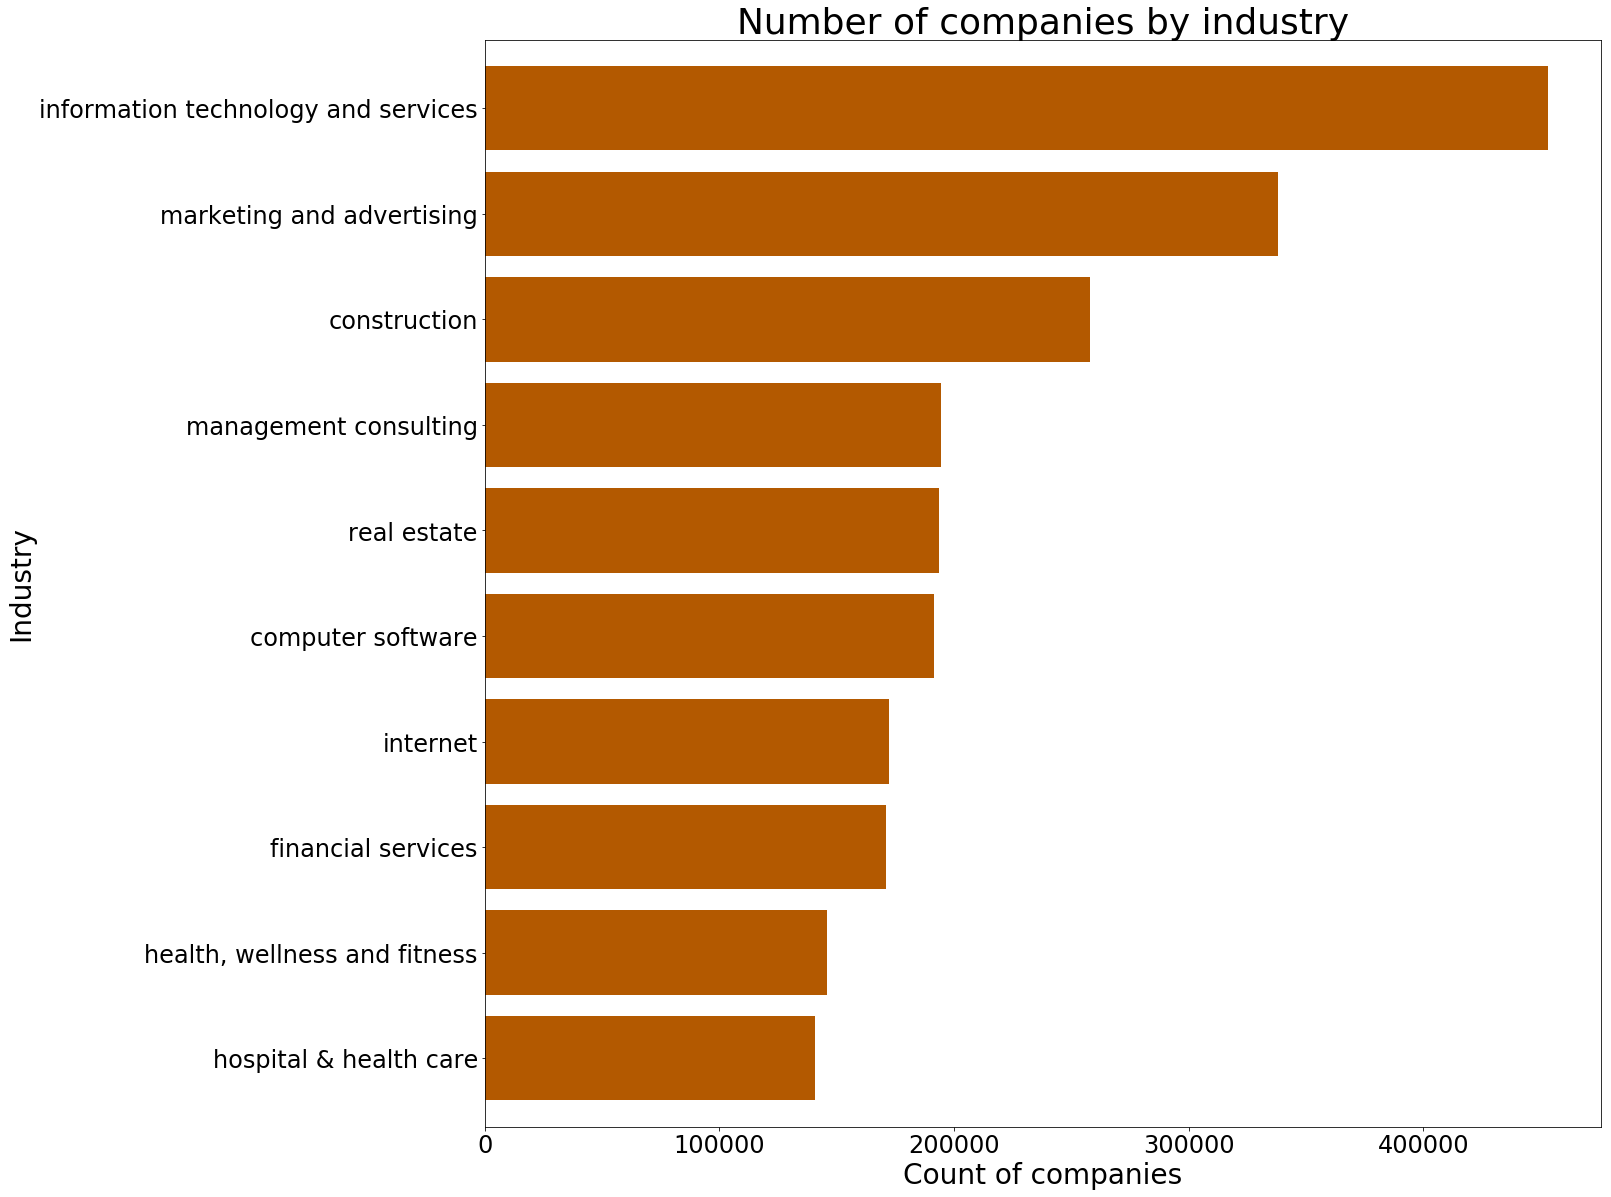

In [27]:
# Realizamos una gráfica de industria vs cantidad de empresas
count_per_industry_collect  = count_per_industry.collect()
industries_items = [item[0] for item in count_per_industry_collect]
count_items = [item[1] for item in count_per_industry_collect]
count_per_industry_collect = {"industry" : industries_items, "count": count_items}
count_per_industry_df = pd.DataFrame(count_per_industry_collect)
count_per_industry_df = count_per_industry_df.sort_values(by = "count", ascending  = False)
count_per_industry_df = count_per_industry_df.iloc[:10]

myplot = count_per_industry_df .plot(figsize = (20,20), kind = "barh", color = "#b35900", width = 0.8,
                               x = "industry", y = "count", legend = False)

myplot.invert_yaxis()

plt.xlabel("Count of companies", fontsize = 28)
plt.ylabel("Industry", fontsize = 28)
plt.title("Number of companies by industry", fontsize = 36)
plt.xticks(size = 24)
plt.yticks(size = 24)
plt.show()

### Determinar cuál es la industria principal en Uruguay

In [28]:
# Primero nos quedamos con las empresas de Uruguay
uruguay_companies = companies.where((companies["country"] == "uruguay"))

In [29]:
# Observamos cuántas empresas en el dataset son de Uruguay
uruguay_companies.count()

3036

In [30]:
# Agrupamos las empresas por industria
count_per_industry_in_uruguay = uruguay_companies.groupBy("industry").count()
count_per_industry_in_uruguay.show()

+--------------------+-----+
|            industry|count|
+--------------------+-----+
|aviation & aerospace|    1|
|     pharmaceuticals|   17|
|recreational faci...|    4|
|     broadcast media|   25|
|             fishery|    1|
|           utilities|    5|
|          publishing|    7|
|          veterinary|    2|
|         think tanks|    3|
|          automotive|   20|
|industrial automa...|   11|
|packaging and con...|    6|
|        law practice|   16|
|               dairy|    1|
|         warehousing|    2|
|health, wellness ...|   32|
|           wholesale|   25|
|environmental ser...|   10|
|         real estate|   98|
| program development|   33|
+--------------------+-----+
only showing top 20 rows



In [31]:
# Calculamos cuántas empresas tiene la industria con más empresas en Uruguay
count_industry_with_more_companies_in_uruguay = count_per_industry_in_uruguay.agg({"count" : "max"}).collect()[0][0]

In [32]:
print("La industria con más empresas en Uruguay tiene {} empresas".format(count_industry_with_more_companies_in_uruguay))

La industria con más empresas en Uruguay tiene 344 empresas


In [33]:
# Calculamos cual es la industria con más empresas en Uruguay
count_per_industry_in_uruguay.where((count_per_industry_in_uruguay["count"] == count_industry_with_more_companies_in_uruguay)).show()

+--------------------+-----+
|            industry|count|
+--------------------+-----+
|information techn...|  344|
+--------------------+-----+



#### => La industria con más empresas en Uruguay es "Information technology and services"

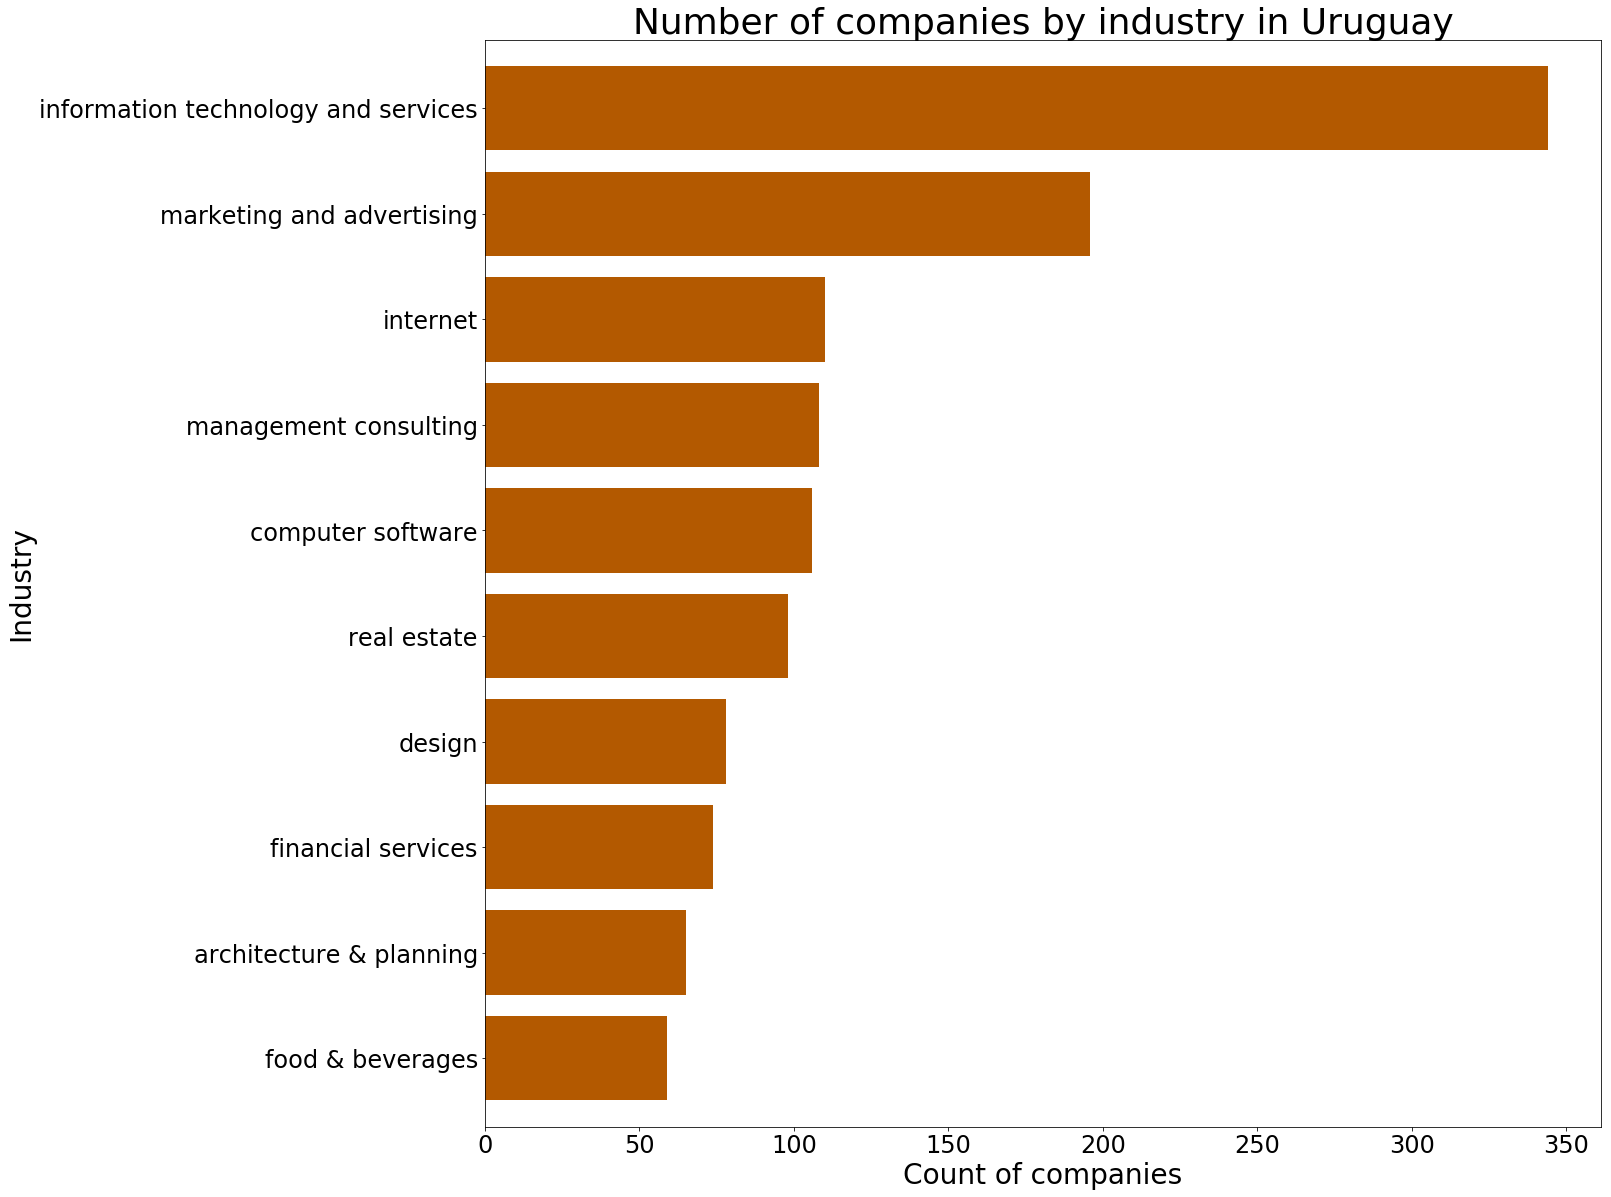

In [34]:
# Realizamos una gráfica de industria vs cantidad de empresas en Uruguay
count_per_industry_in_uruguay_collect  = count_per_industry_in_uruguay.collect()
industries_items_uruguay = [item[0] for item in count_per_industry_in_uruguay_collect]
count_items_uruguay = [item[1] for item in count_per_industry_in_uruguay_collect]
count_per_industry_in_uruguay_collect = {"industry" : industries_items_uruguay, "count": count_items_uruguay}
count_per_industry_uruguay_df = pd.DataFrame(count_per_industry_in_uruguay_collect)
count_per_industry_uruguay_df = count_per_industry_uruguay_df.sort_values(by = "count", ascending  = False)
count_per_industry_uruguay_df = count_per_industry_uruguay_df.iloc[:10]

myplot = count_per_industry_uruguay_df.plot(figsize = (20,20), kind = "barh", color = "#b35900", width = 0.8,
                               x = "industry", y = "count", legend = False)

myplot.invert_yaxis()

plt.xlabel("Count of companies", fontsize = 28)
plt.ylabel("Industry", fontsize = 28)
plt.title("Number of companies by industry in Uruguay", fontsize = 36)
plt.xticks(size = 24)
plt.yticks(size = 24)
plt.show()

### Determinar cuál es la industria principal en Estados Unidos

In [35]:
# Primero nos quedamos con las empresas de Estados Unidos
american_companies = companies.where((companies["country"] == "united states"))

In [36]:
# Observamos cuántas empresas en el dataset son de Estados Unidos
american_companies.count()

2278866

In [37]:
# Agrupamos las empresas por industria
count_per_industry_in_usa = american_companies.groupBy("industry").count()
count_per_industry_in_usa.show()

+--------------------+-----+
|            industry|count|
+--------------------+-----+
|aviation & aerospace| 7265|
|glass, ceramics &...| 1529|
|     pharmaceuticals|10775|
|recreational faci...| 6524|
|     defense & space| 5520|
|     broadcast media| 8091|
|             fishery|  756|
|           utilities| 6302|
|          publishing|12582|
|          veterinary| 8837|
|         think tanks| 2009|
|          automotive|39140|
|industrial automa...| 6576|
|packaging and con...| 4935|
|        law practice|37903|
|               dairy| 1129|
|         warehousing| 4090|
|health, wellness ...|57433|
|railroad manufacture|  507|
|           wholesale|14321|
+--------------------+-----+
only showing top 20 rows



In [38]:
# Calculamos cuántas empresas tiene la industria con más empresas en Estados Unidos
count_industry_with_more_companies_in_usa = count_per_industry_in_usa.agg({"count" : "max"}).collect()[0][0]

In [39]:
print("La industria con más empresas en Estados Unidos tiene {} empresas".format(count_industry_with_more_companies_in_usa))

La industria con más empresas en Estados Unidos tiene 113767 empresas


In [40]:
# Calculamos cual es la industria con más empresas en Estados Unidos
count_per_industry_in_usa.where((count_per_industry_in_usa["count"] == count_industry_with_more_companies_in_usa)).show()

+------------+------+
|    industry| count|
+------------+------+
|construction|113767|
+------------+------+



#### => La industria con más empresas en Estados Unidos es "Construcción"

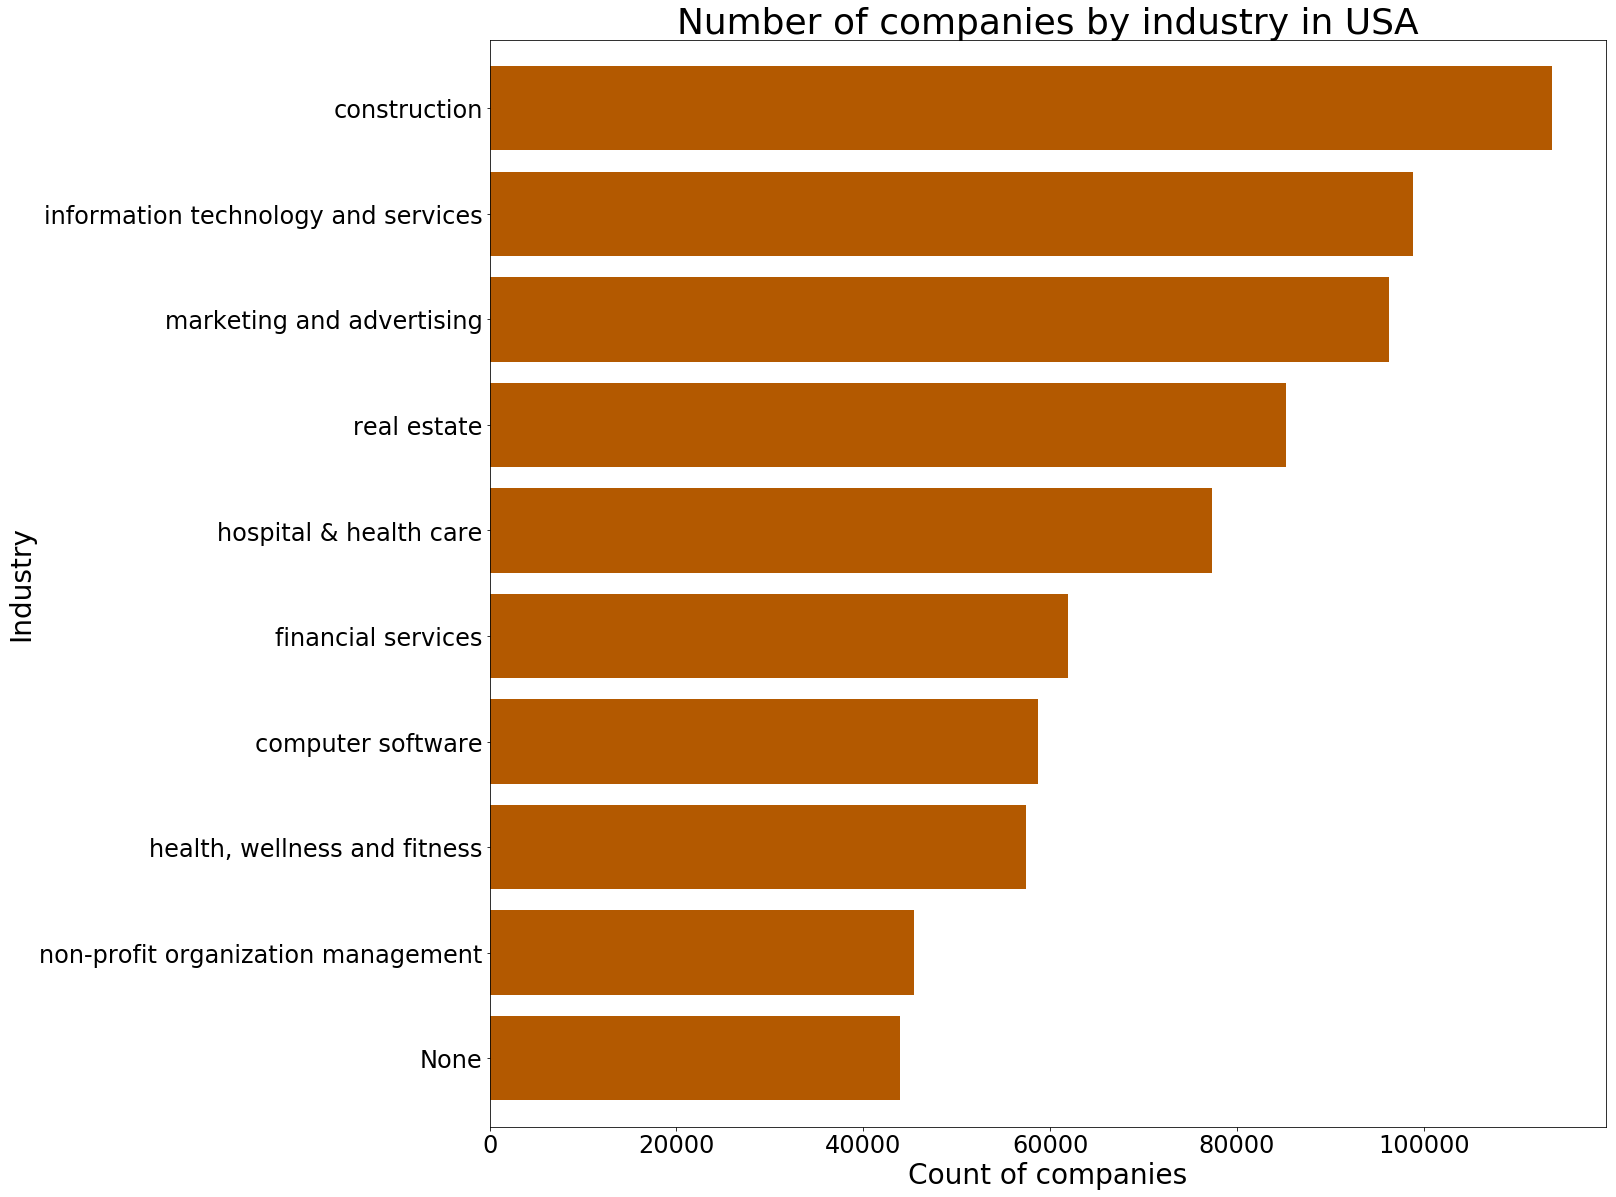

In [41]:
# Realizamos una gráfica de industria vs cantidad de empresas en Estados Unidos
count_per_industry_in_usa_collect  = count_per_industry_in_usa.collect()
industries_items_usa = [item[0] for item in count_per_industry_in_usa_collect]
count_items_usa = [item[1] for item in count_per_industry_in_usa_collect]
count_per_industry_in_usa_collect = {"industry" : industries_items_usa, "count": count_items_usa}
count_per_industry_usa_df = pd.DataFrame(count_per_industry_in_usa_collect)
count_per_industry_usa_df = count_per_industry_usa_df.sort_values(by = "count", ascending  = False)
count_per_industry_usa_df = count_per_industry_usa_df.iloc[:10]

myplot = count_per_industry_usa_df.plot(figsize = (20,20), kind = "barh", color = "#b35900", width = 0.8,
                               x = "industry", y = "count", legend = False)

myplot.invert_yaxis()

plt.xlabel("Count of companies", fontsize = 28)
plt.ylabel("Industry", fontsize = 28)
plt.title("Number of companies by industry in USA", fontsize = 36)
plt.xticks(size = 24)
plt.yticks(size = 24)
plt.show()

### Determinar el país con más empresas

In [42]:
# Agrupamos las empresas por país
count_per_country = companies.filter(companies["country"].isNotNull()).groupBy("country").count()
count_per_country.show()

+--------------------+------+
|             country| count|
+--------------------+------+
|            guernsey|   325|
|               aruba|   130|
|             finland| 17193|
|           australia|117133|
|              greece| 10937|
|           greenland|   100|
|            portugal| 21586|
|              israel| 10097|
|             ukraine|  6481|
|             nigeria|  7584|
|netherlands antilles|   114|
|              angola|   721|
|             eritrea|     4|
|         timor-leste|    14|
|              zambia|   480|
|        cook islands|    26|
|          seychelles|   132|
|       liechtenstein|   260|
|             bermuda|   746|
|               macau|   149|
+--------------------+------+
only showing top 20 rows



In [43]:
# Calculamos cuántas empresas tiene el país con más empresas
count_country_with_more_companies = count_per_country.agg({"count" : "max"}).collect()[0][0]

In [44]:
print("El país con más empresas tiene {} empresas".format(count_country_with_more_companies))

El país con más empresas tiene 2278866 empresas


In [45]:
# Calculamos cual es el país con más empresas a nivel mundial
count_per_country.where((count_per_country["count"] == count_country_with_more_companies)).show()

+-------------+-------+
|      country|  count|
+-------------+-------+
|united states|2278866|
+-------------+-------+



#### => El país con más empresas es: Estados Unidos

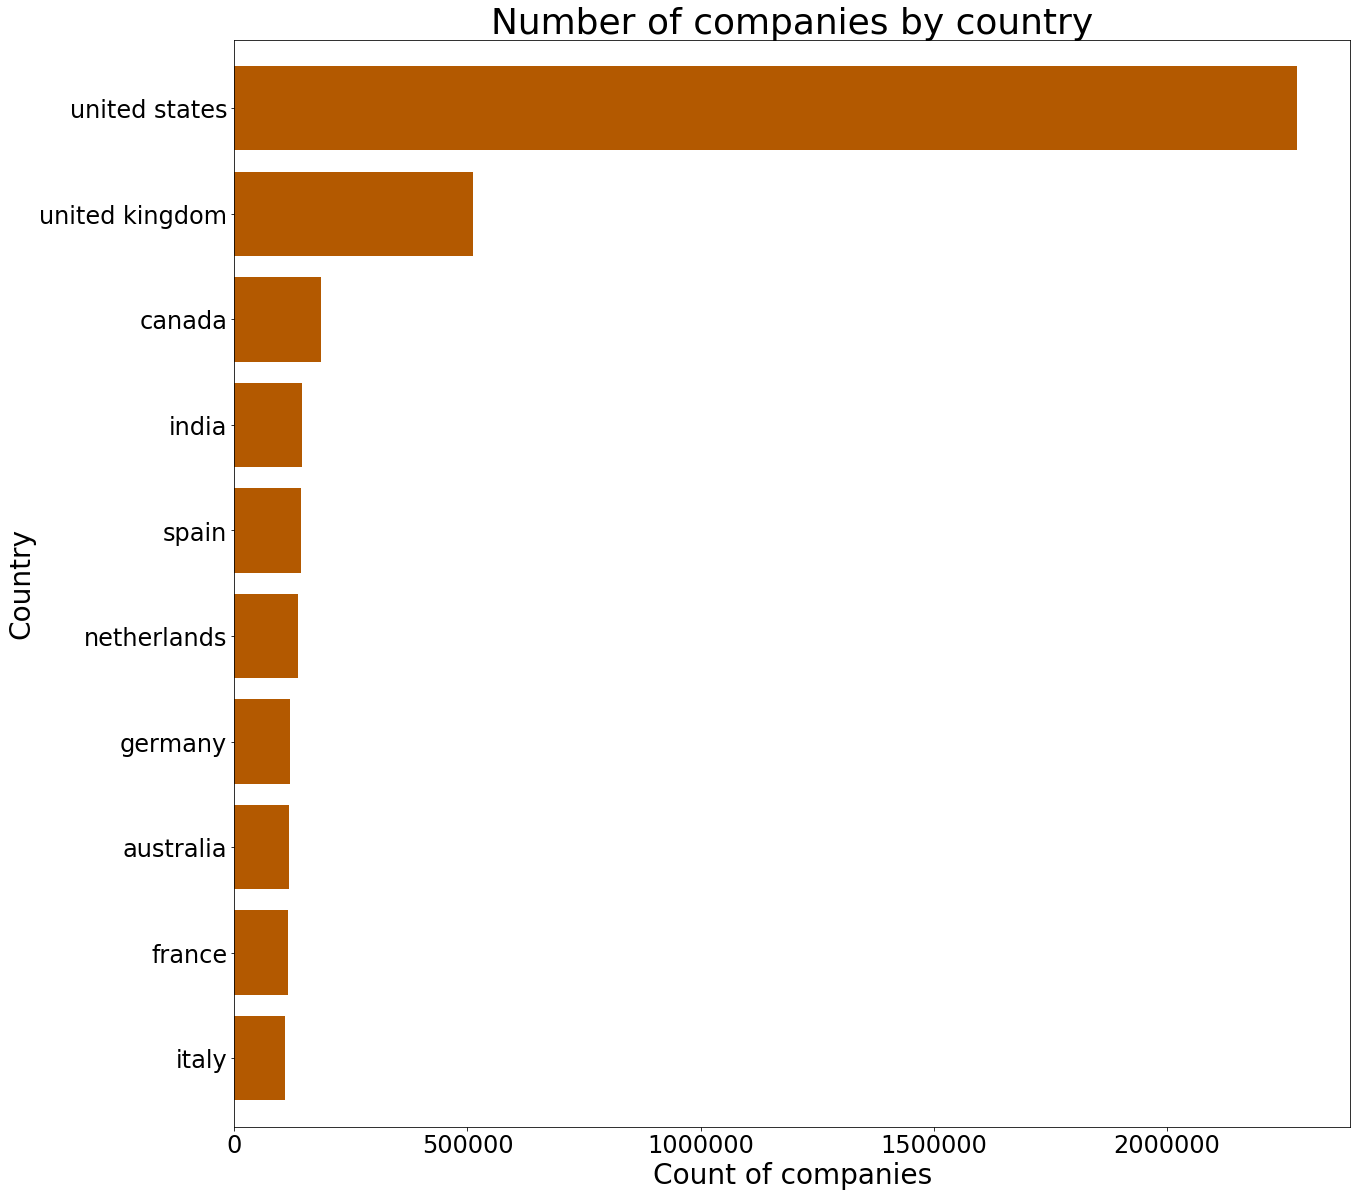

In [46]:
# Realizamos una gráfica de país vs cantidad de empresas
count_per_country_collect  = count_per_country.collect()
countries_items = [item[0] for item in count_per_country_collect]
count_items = [item[1] for item in count_per_country_collect]
count_per_country_collect = {"country" : countries_items, "count": count_items}
count_per_country_df = pd.DataFrame(count_per_country_collect)
count_per_country_df = count_per_country_df.sort_values(by = "count", ascending  = False)
count_per_country_df = count_per_country_df.iloc[:10]

myplot = count_per_country_df.plot(figsize = (20,20), kind = "barh", color = "#b35900", width = 0.8,
                               x = "country", y = "count", legend = False)

myplot.invert_yaxis()

plt.xlabel("Count of companies", fontsize = 28)
plt.ylabel("Country", fontsize = 28)
plt.title("Number of companies by country", fontsize = 36)
plt.xticks(size = 24)
plt.yticks(size = 24)
plt.show()

### Determinar la localidad con más empresas a nivel mundial

In [47]:
# Agrupamos el dataset por localidad, y observamos la cantidad de empresas por localidad
count_per_locality = companies.filter(companies["locality"].isNotNull()).groupBy("locality").count()

In [48]:
count_per_locality.show()

+--------------------+-----+
|            locality|count|
+--------------------+-----+
|helsinki, uusimaa...| 6489|
|naples, florida, ...| 2621|
|cuauhtemoc, mexic...|   12|
|tarrytown, new yo...|  312|
|alvares florence,...|    5|
|sherbrooke, quebe...|  705|
|shreveport, louis...| 1142|
|hempstead, new yo...|  220|
|jordan, new york,...|  185|
|williamsburg, vir...|  618|
|kingsey falls, qu...|   10|
|frederick, maryla...| 1204|
|pell city, alabam...|   83|
|nacogdoches, texa...|  210|
|san marcos, calif...|  738|
|vila nova de fama...|  145|
|heerenveen, fries...|  380|
|hays, kansas, uni...|  156|
|carmen, campeche,...|   49|
|firestone, colora...|   47|
+--------------------+-----+
only showing top 20 rows



In [49]:
# Calculamos cuántas empresas tiene la localidad con más empresas
count_locality_with_more_companies = count_per_locality.agg({"count" : "max"}).collect()[0][0]

In [50]:
print("La localidad con más empresas tiene {} empresas".format(count_locality_with_more_companies))

La localidad con más empresas tiene 88225 empresas


In [51]:
# Calculamos cual es la localidad con más empresas
count_per_locality.where((count_per_locality["count"] == count_locality_with_more_companies)).show()

+--------------------+-----+
|            locality|count|
+--------------------+-----+
|london, greater l...|88225|
+--------------------+-----+



#### => La localidad con más empresas es "London, Greater london, United Kingdom"

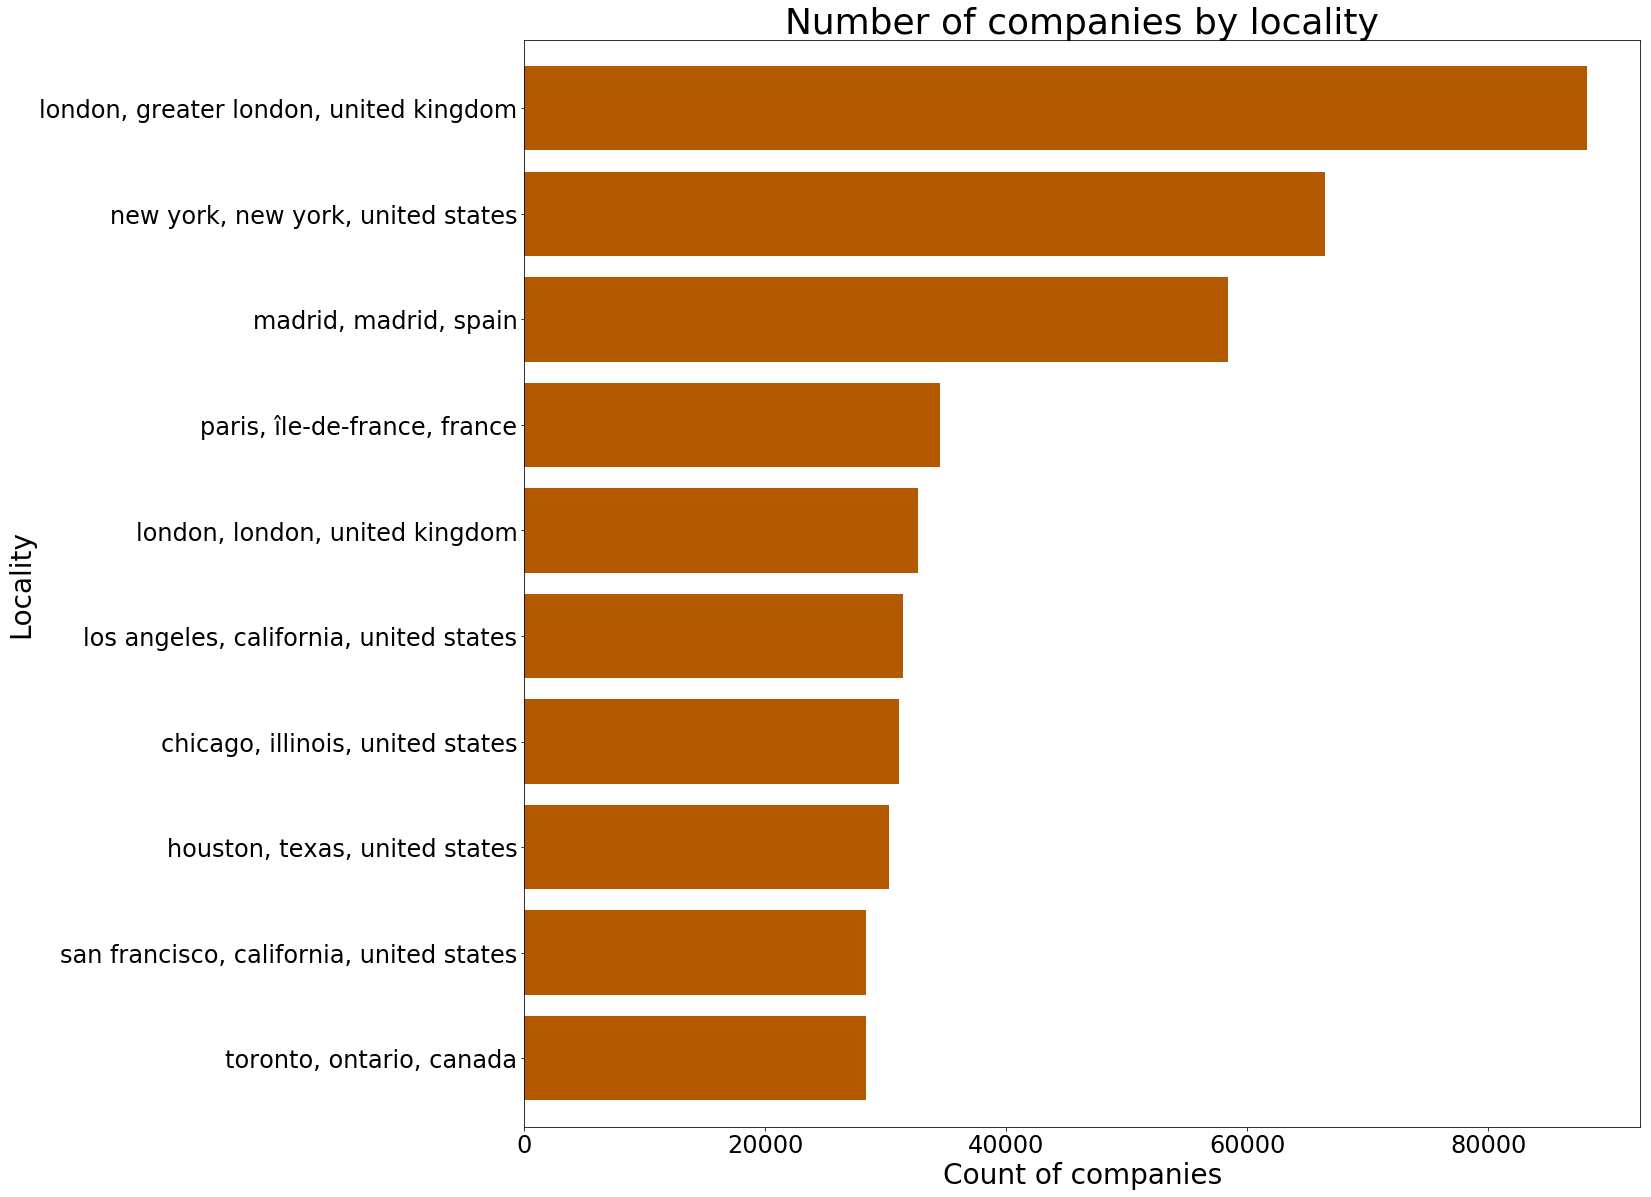

In [52]:
# Realizamos una gráfica de localidad vs cantidad de empresas
count_per_locality_collect  = count_per_locality.collect()
localities_items = [item[0] for item in count_per_locality_collect]
count_items = [item[1] for item in count_per_locality_collect]
count_per_locality_collect = {"locality" : localities_items, "count": count_items}
count_per_locality_df = pd.DataFrame(count_per_locality_collect)
count_per_locality_df = count_per_locality_df.sort_values(by = "count", ascending  = False)
count_per_locality_df = count_per_locality_df.iloc[:10]

myplot = count_per_locality_df.plot(figsize = (20,20), kind = "barh", color = "#b35900", width = 0.8,
                               x = "locality", y = "count", legend = False)

myplot.invert_yaxis()

plt.xlabel("Count of companies", fontsize = 28)
plt.ylabel("Locality", fontsize = 28)
plt.title("Number of companies by locality", fontsize = 36)
plt.xticks(size = 24)
plt.yticks(size = 24)
plt.show()

### Determinar la localidad con más empresas en Uruguay

In [53]:
# Primero nos quedamos con las empresas de Uruguay
uruguay_companies = companies.where((companies["country"] == "uruguay") & companies["locality"].isNotNull())

In [54]:
# Agrupamos las empresas por localidad
count_per_locality_in_uruguay = uruguay_companies.groupBy("locality").count()
count_per_locality_in_uruguay.show()

+--------------------+-----+
|            locality|count|
+--------------------+-----+
|san carlos de bar...|   14|
|atlantida, canelo...|    3|
|rivera, rivera, u...|    2|
|centro, montevide...|    7|
|ciudad de la cost...|   15|
|ciudad vieja, dep...|    1|
|joanico, canelone...|    1|
|maldonado, maldon...|   23|
|río branco, cerro...|    1|
|shangrila, canelo...|    3|
|punta carretas, m...|    4|
|barra de carrasco...|    3|
|tala, canelones, ...|    1|
|bolson, catamarca...|    1|
|dolores, soriano,...|    3|
|juan lacaze, colo...|    1|
|colon, montevideo...|    1|
|balneario flor de...|    1|
|mercedes, soriano...|    6|
|colonia nicolich,...|    2|
+--------------------+-----+
only showing top 20 rows



In [55]:
# Calculamos cuántas empresas tiene la localidad con más empresas en Uruguay
count_locality_with_more_companies_in_uruguay = count_per_locality_in_uruguay.agg({"count" : "max"}).collect()[0][0]

In [56]:
print("La localidad con más empresas en Uruguay tiene {} empresas".format(count_locality_with_more_companies_in_uruguay))

La localidad con más empresas en Uruguay tiene 2575 empresas


In [57]:
# Calculamos cual es la localidad con más empresas en Uruguay
count_per_locality_in_uruguay.where((count_per_locality_in_uruguay["count"] == count_locality_with_more_companies_in_uruguay)).show()

+--------------------+-----+
|            locality|count|
+--------------------+-----+
|montevideo, monte...| 2575|
+--------------------+-----+



#### => La localidad con más empresas en Uruguay es "Montevideo, Montevideo, Uruguay"

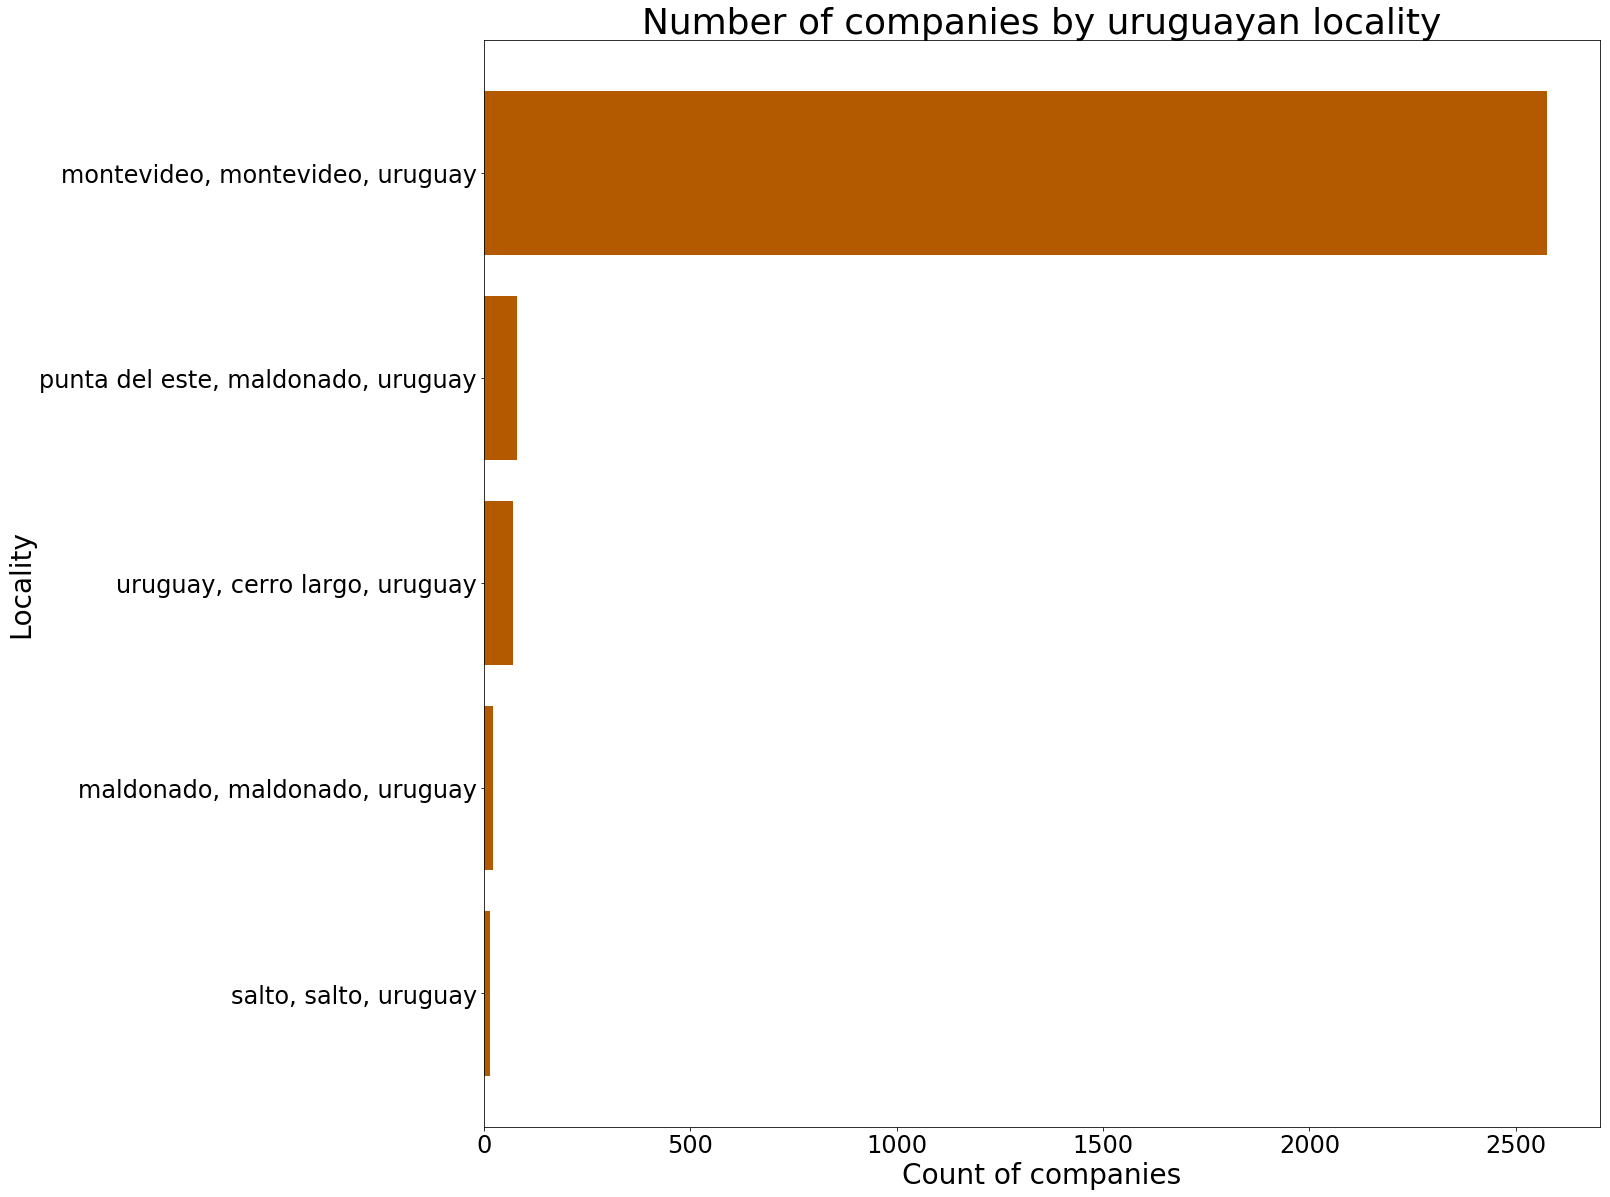

In [58]:
# Realizamos una gráfica de localidad uruguaya vs cantidad de empresas
count_per_locality_in_uruguay_collect  = count_per_locality_in_uruguay.collect()
localities_uruguay_items = [item[0] for item in count_per_locality_in_uruguay_collect]
count_items = [item[1] for item in count_per_locality_in_uruguay_collect]
count_per_locality_in_uruguay_collect = {"locality" : localities_uruguay_items, "count": count_items}
count_per_locality_in_uruguay_df = pd.DataFrame(count_per_locality_in_uruguay_collect)
count_per_locality_in_uruguay_df = count_per_locality_in_uruguay_df.sort_values(by = "count", ascending  = False)
count_per_locality_in_uruguay_df = count_per_locality_in_uruguay_df.iloc[:5]

myplot = count_per_locality_in_uruguay_df.plot(figsize = (20,20), kind = "barh", color = "#b35900", width = 0.8,
                               x = "locality", y = "count", legend = False)

myplot.invert_yaxis()

plt.xlabel("Count of companies", fontsize = 28)
plt.ylabel("Locality", fontsize = 28)
plt.title("Number of companies by uruguayan locality", fontsize = 36)
plt.xticks(size = 24)
plt.yticks(size = 24)
plt.show()

### Determinar la localidad con más empresas en Estados Unidos

In [59]:
# Primero nos quedamos con las empresas de Estados Unidos
usa_companies = companies.where((companies["country"] == "united states"))

In [60]:
# Agrupamos las empresas por localidad
count_per_locality_in_usa = usa_companies.groupBy("locality").count()
count_per_locality_in_usa.show()

+--------------------+-----+
|            locality|count|
+--------------------+-----+
|naples, florida, ...| 2620|
|tarrytown, new yo...|  312|
|shreveport, louis...| 1141|
|hempstead, new yo...|  220|
|williamsburg, vir...|  617|
|frederick, maryla...| 1201|
|pell city, alabam...|   83|
|jordan, new york,...|   52|
|nacogdoches, texa...|  210|
|san marcos, calif...|  738|
|hays, kansas, uni...|  156|
|firestone, colora...|   47|
|tuskegee, alabama...|   23|
|menasha, wisconsi...|  152|
|roseville, minnes...|  290|
|bryn mawr, pennsy...|  275|
|angels camp, cali...|   30|
|homosassa, florid...|   84|
|maynard, massachu...|  157|
|woodbridge, new j...|  268|
+--------------------+-----+
only showing top 20 rows



In [61]:
# Calculamos cuántas empresas tiene la localidad con más empresas en Estados Unidos
count_locality_with_more_companies_in_usa = count_per_locality_in_usa.agg({"count" : "max"}).collect()[0][0]

In [62]:
print("La localidad con más empresas en Estados Unidos tiene {} empresas".format(count_locality_with_more_companies_in_usa))

La localidad con más empresas en Estados Unidos tiene 66177 empresas


In [63]:
# Calculamos cual es la localidad con más empresas en Estados Unidos
count_per_locality_in_usa.where((count_per_locality_in_usa["count"] == count_locality_with_more_companies_in_usa)).show()

+--------------------+-----+
|            locality|count|
+--------------------+-----+
|new york, new yor...|66177|
+--------------------+-----+



#### => La localidad con más empresas en Estados Unidos es "New York, New York, Estados Unidos"

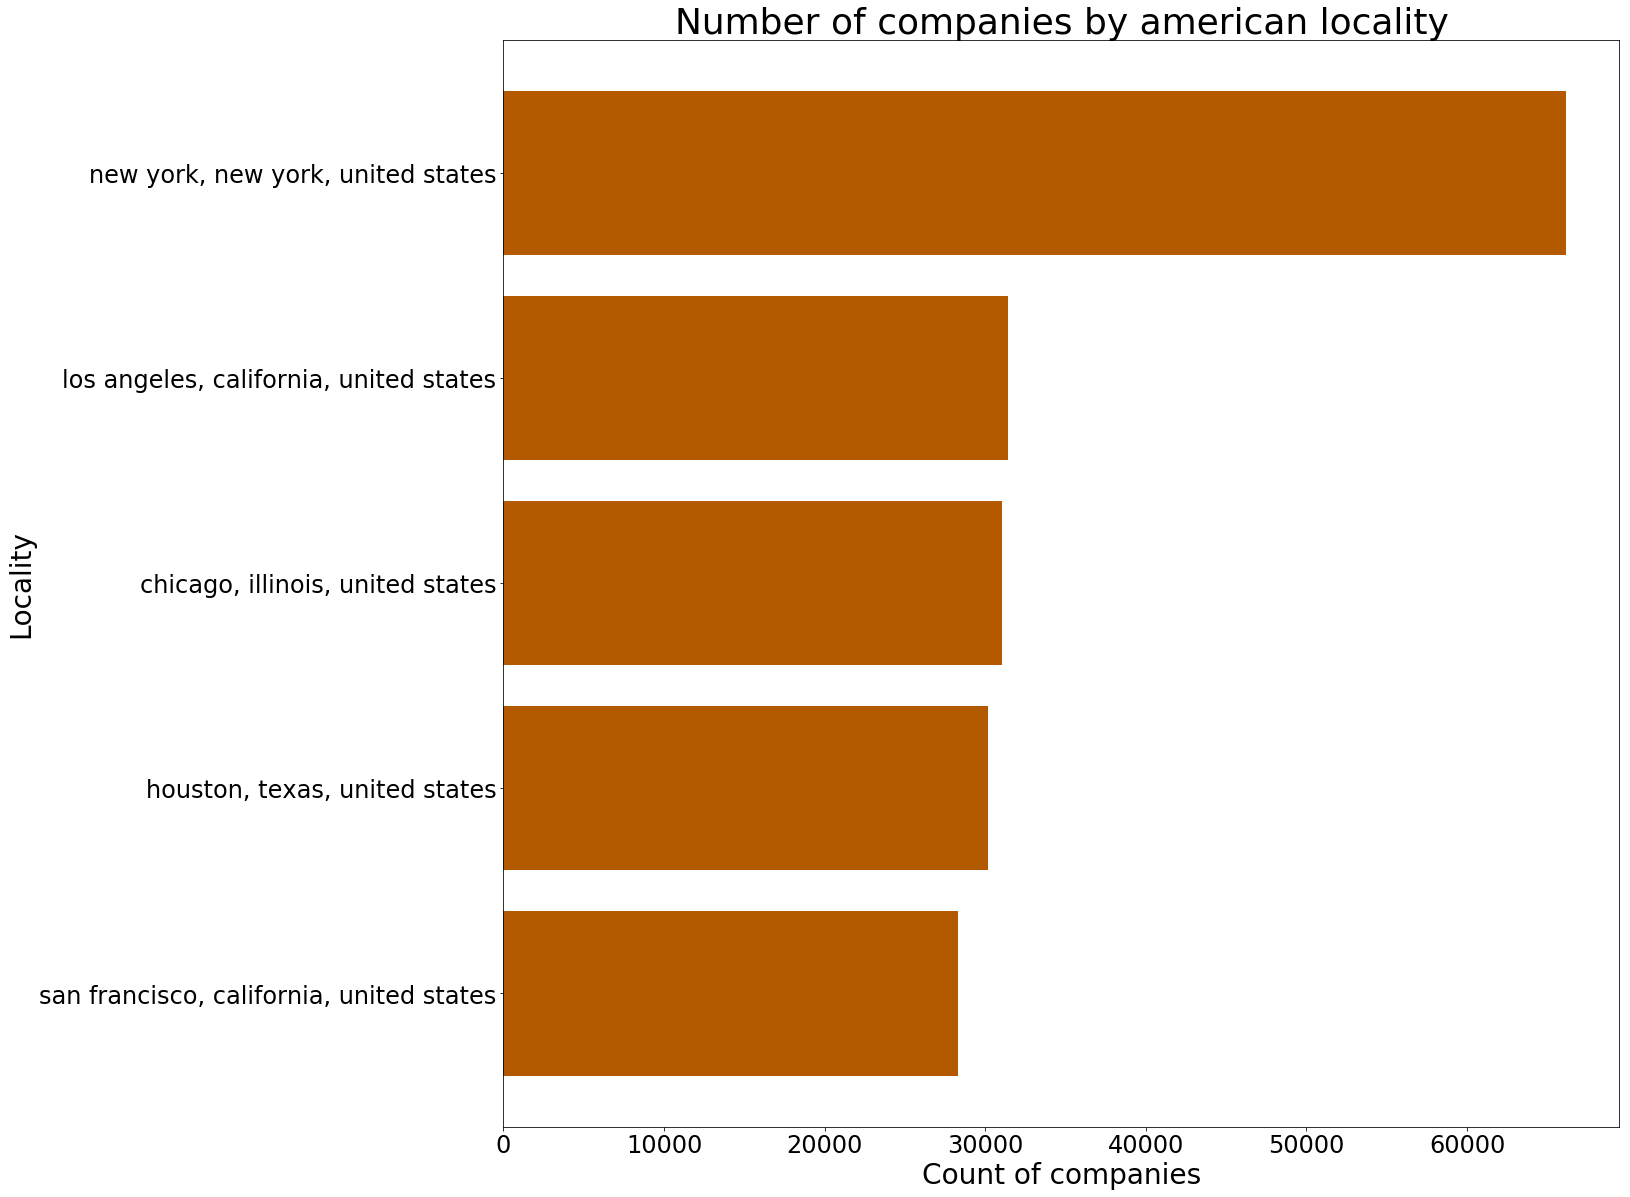

In [64]:
# Realizamos una gráfica de localidad americana vs cantidad de empresas
count_per_locality_in_usa_collect  = count_per_locality_in_usa.collect()
localities_usa_items = [item[0] for item in count_per_locality_in_usa_collect]
count_items = [item[1] for item in count_per_locality_in_usa_collect]
count_per_locality_in_usa_collect = {"locality" : localities_usa_items, "count": count_items}
count_per_locality_in_usa_df = pd.DataFrame(count_per_locality_in_usa_collect)
count_per_locality_in_usa_df = count_per_locality_in_usa_df.sort_values(by = "count", ascending  = False)
count_per_locality_in_usa_df = count_per_locality_in_usa_df.iloc[:5]

myplot = count_per_locality_in_usa_df.plot(figsize = (20,20), kind = "barh", color = "#b35900", width = 0.8,
                               x = "locality", y = "count", legend = False)

myplot.invert_yaxis()

plt.xlabel("Count of companies", fontsize = 28)
plt.ylabel("Locality", fontsize = 28)
plt.title("Number of companies by american locality", fontsize = 36)
plt.xticks(size = 24)
plt.yticks(size = 24)
plt.show()

### Determinar la industria con mayor cantidad de empleados a nivel mundial

In [65]:
# Agrupamos el dataset por industria, y sumamos la cantidad actual de empleados por cada industria
sum_employees_per_industry = companies.groupBy("industry").sum("current employee estimate")

In [66]:
sum_employees_per_industry.show()

+--------------------+------------------------------+
|            industry|sum(current employee estimate)|
+--------------------+------------------------------+
|aviation & aerospace|                        558620|
|glass, ceramics &...|                         67533|
|     pharmaceuticals|                       1445570|
|recreational faci...|                         79037|
|     defense & space|                        667586|
|     broadcast media|                        626556|
|             fishery|                         16762|
|          publishing|                        464770|
|           utilities|                        769332|
|          veterinary|                         62759|
|         think tanks|                         54268|
|          automotive|                       1992528|
|industrial automa...|                        281801|
|packaging and con...|                        232698|
|        law practice|                        893512|
|               dairy|      

In [67]:
# Calculamos cuántos empleados tiene actualmente la industria con más empleados
sum_company_with_more_employees = sum_employees_per_industry.agg({"sum(current employee estimate)" : "max"}).collect()[0][0]

In [68]:
print("La industria con más empleados actualmente tiene {} empleados".format(sum_company_with_more_employees))

La industria con más empleados actualmente tiene 7001149 empleados


In [69]:
# Calculamos cual es la industria con más empleados
sum_employees_per_industry.where((sum_employees_per_industry["sum(current employee estimate)"] == sum_company_with_more_employees)).show()

+--------------------+------------------------------+
|            industry|sum(current employee estimate)|
+--------------------+------------------------------+
|information techn...|                       7001149|
+--------------------+------------------------------+



#### => La industria con más empleados actualmente es "Information Technolgy and Services"

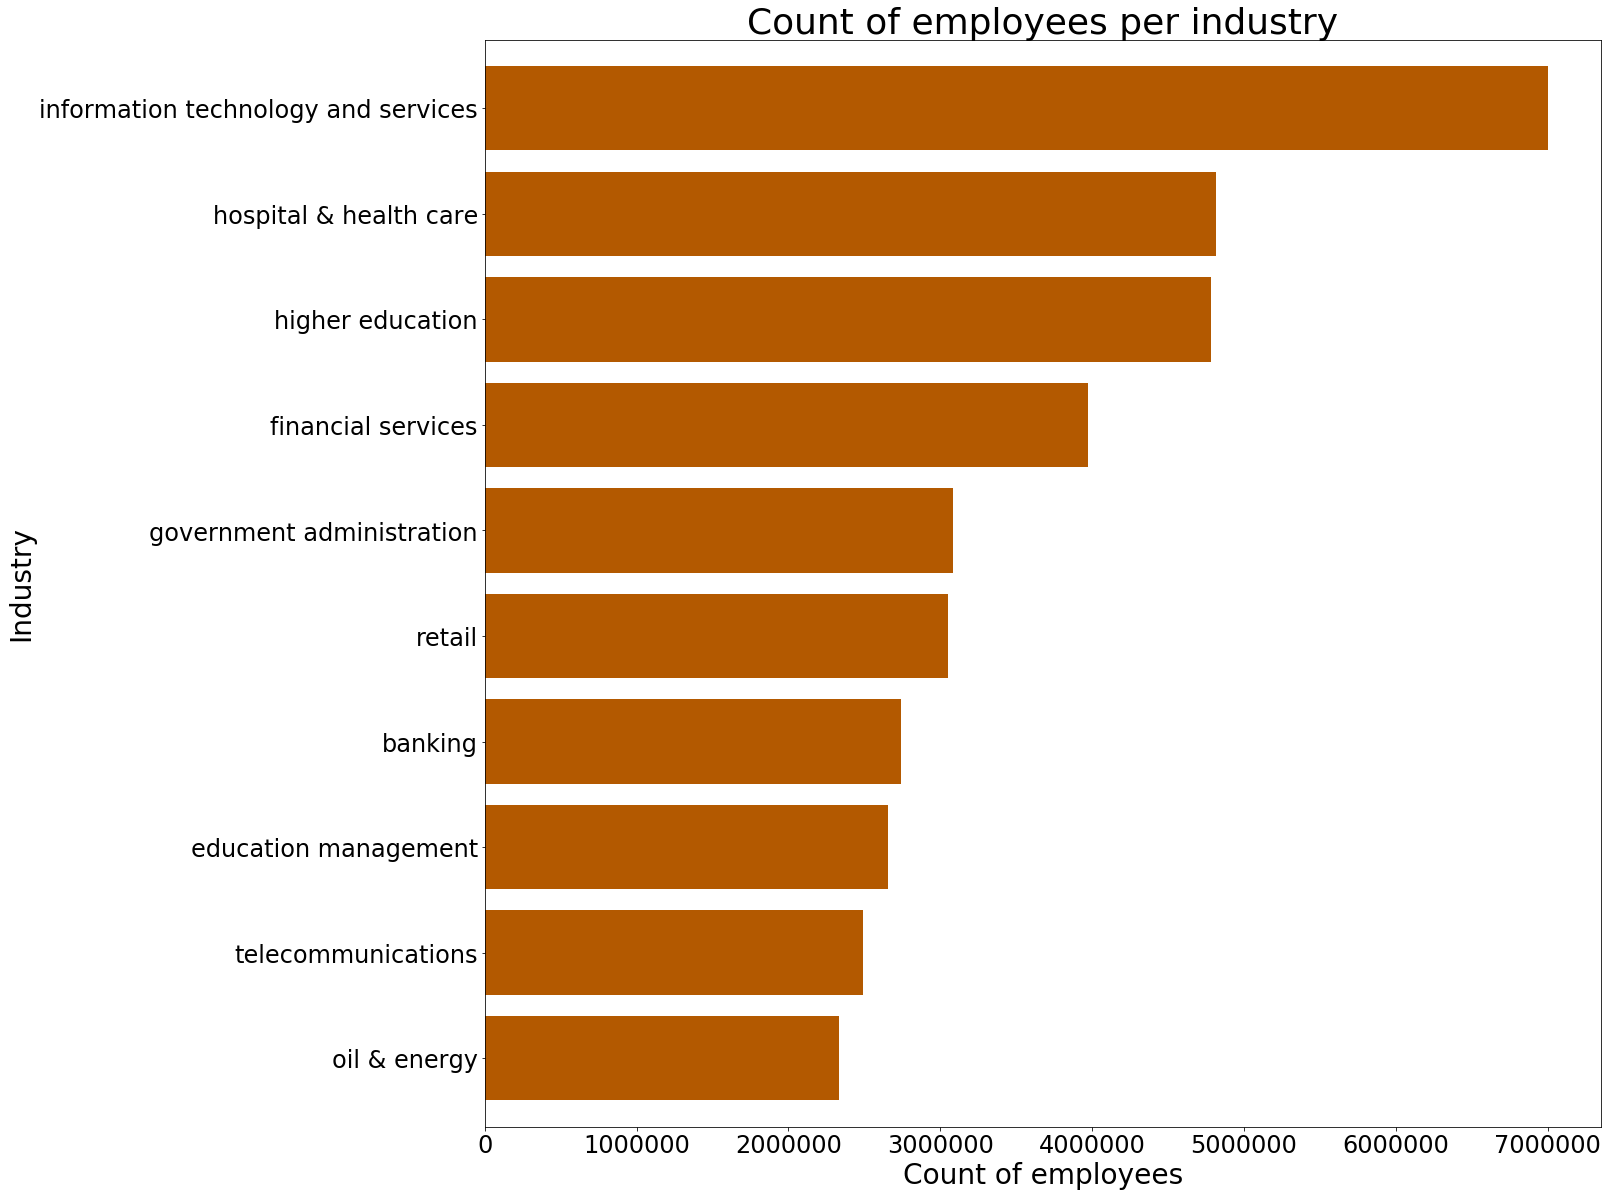

In [70]:
# Realizamos una gráfica de industria vs cantidad de empleados
sum_employees_per_industry_collect  = sum_employees_per_industry.collect()
employees_items = [item[0] for item in sum_employees_per_industry_collect]
count_items = [item[1] for item in sum_employees_per_industry_collect]
sum_employees_per_industry_collect = {"employees" : employees_items, "count": count_items}
sum_employees_per_industry_df = pd.DataFrame(sum_employees_per_industry_collect)
sum_employees_per_industry_df = sum_employees_per_industry_df.sort_values(by = "count", ascending  = False)
sum_employees_per_industry_df = sum_employees_per_industry_df.iloc[:10]

myplot = sum_employees_per_industry_df.plot(figsize = (20,20), kind = "barh", color = "#b35900", width = 0.8,
                               x = "employees", y = "count", legend = False)

myplot.invert_yaxis()

plt.xlabel("Count of employees", fontsize = 28)
plt.ylabel("Industry", fontsize = 28)
plt.title("Count of employees per industry", fontsize = 36)
plt.xticks(size = 24)
plt.yticks(size = 24)
plt.show()

### Determinar la industria con mayor cantidad de empleados en Uruguay

In [71]:
# Primero nos quedamos con las empresas de Uruguay
uruguay_companies = companies.where((companies["country"] == "uruguay"))

In [72]:
# Agrupamos el resultado por industria, y sumamos la cantidad actual de empleados por cada industria
sum_employees_per_industry_in_uruguay = uruguay_companies.groupBy("industry").sum("current employee estimate")

In [73]:
sum_employees_per_industry_in_uruguay.show()

+--------------------+------------------------------+
|            industry|sum(current employee estimate)|
+--------------------+------------------------------+
|aviation & aerospace|                             6|
|     pharmaceuticals|                           323|
|recreational faci...|                            42|
|     broadcast media|                           200|
|             fishery|                             1|
|           utilities|                          1716|
|          publishing|                           246|
|          veterinary|                           124|
|         think tanks|                             2|
|          automotive|                           127|
|industrial automa...|                            25|
|packaging and con...|                            26|
|        law practice|                           296|
|               dairy|                            13|
|         warehousing|                             2|
|health, wellness ...|      

In [74]:
# Calculamos cuántos empleados tiene actualmente la industria con más empleados en Uruguay
sum_company_with_more_employees_in_uruguay = sum_employees_per_industry_in_uruguay.agg({"sum(current employee estimate)" : "max"}).collect()[0][0]

In [75]:
print("La industria con más empleados actualmente en Uruguay tiene {} empleados".format(sum_company_with_more_employees_in_uruguay))

La industria con más empleados actualmente en Uruguay tiene 5867 empleados


In [76]:
# Calculamos cual es la industria con más empleados en Uruguay
sum_employees_per_industry_in_uruguay.where((sum_employees_per_industry_in_uruguay["sum(current employee estimate)"] == sum_company_with_more_employees_in_uruguay)).show()

+------------------+------------------------------+
|          industry|sum(current employee estimate)|
+------------------+------------------------------+
|telecommunications|                          5867|
+------------------+------------------------------+



#### => La industria con más empleados en Uruguay actualmente es Telecomunicaciones

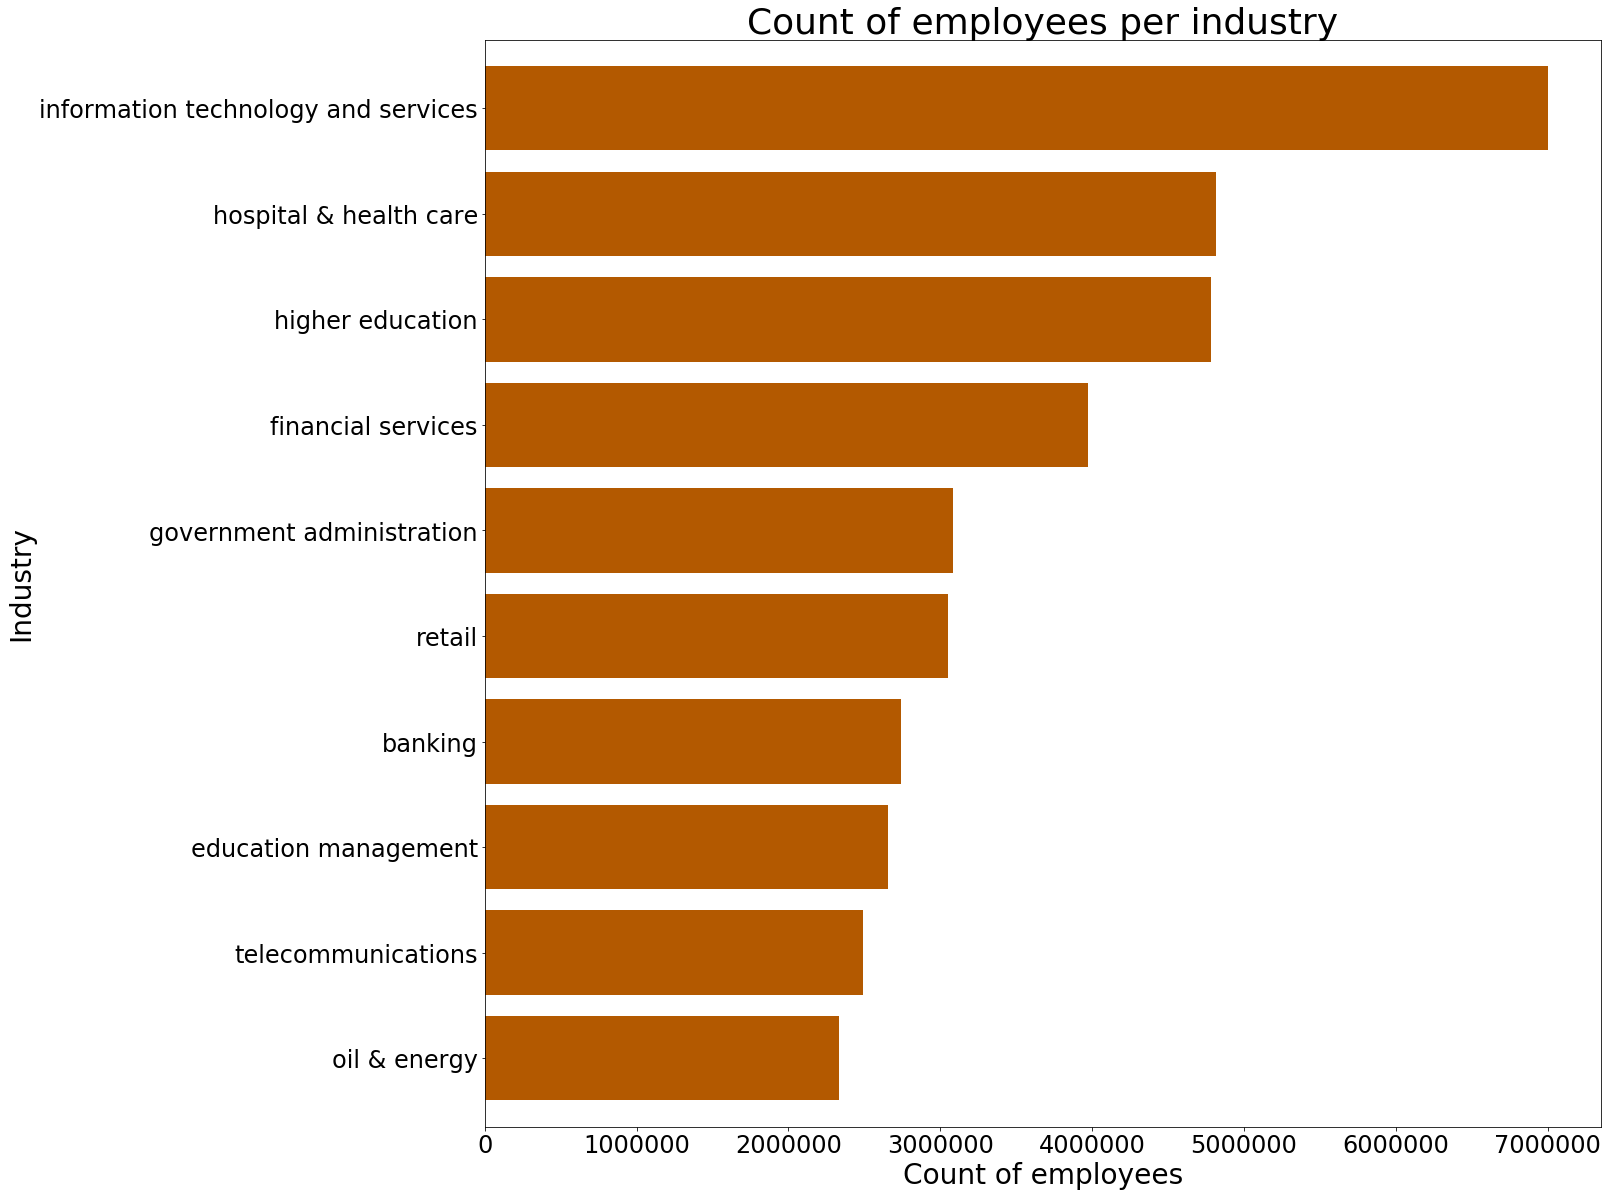

In [77]:
# Realizamos una gráfica de industria vs cantidad de empleados en Uruguay
sum_employees_per_industry_in_uruguay_collect  = sum_employees_per_industry_in_uruguay.collect()
employees_uruguay_items = [item[0] for item in sum_employees_per_industry_in_uruguay_collect]
count_items = [item[1] for item in sum_employees_per_industry_in_uruguay_collect]
sum_employees_per_industry_in_uruguay_collect = {"employees" : employees_uruguay_items, "count": count_items}
sum_employees_per_industry_uruguay_df = pd.DataFrame(sum_employees_per_industry_collect)
sum_employees_per_industry_uruguay_df = sum_employees_per_industry_uruguay_df.sort_values(by = "count", ascending  = False)
sum_employees_per_industry_uruguay_df = sum_employees_per_industry_uruguay_df.iloc[:10]

myplot = sum_employees_per_industry_uruguay_df.plot(figsize = (20,20), kind = "barh", color = "#b35900", width = 0.8,
                               x = "employees", y = "count", legend = False)

myplot.invert_yaxis()

plt.xlabel("Count of employees", fontsize = 28)
plt.ylabel("Industry", fontsize = 28)
plt.title("Count of employees per industry", fontsize = 36)
plt.xticks(size = 24)
plt.yticks(size = 24)
plt.show()

### Determinar la industria con mayor cantidad de empleados en Estados Unidos

In [78]:
# Primero nos quedamos con las empresas de Estados Unidos
usa_companies = companies.where((companies["country"] == "united states"))

In [79]:
# Agrupamos el resultado por industria, y sumamos la cantidad actual de empleados por cada industria
sum_employees_per_industry_in_usa = usa_companies.groupBy("industry").sum("current employee estimate")

In [80]:
sum_employees_per_industry_in_usa.show()

+--------------------+------------------------------+
|            industry|sum(current employee estimate)|
+--------------------+------------------------------+
|aviation & aerospace|                        303421|
|glass, ceramics &...|                         21343|
|     pharmaceuticals|                        516752|
|recreational faci...|                         36652|
|     defense & space|                        458201|
|     broadcast media|                        169507|
|             fishery|                          8320|
|           utilities|                        282748|
|          publishing|                        157177|
|          veterinary|                         32781|
|         think tanks|                         15968|
|          automotive|                        675567|
|industrial automa...|                        105819|
|packaging and con...|                        116922|
|        law practice|                        445013|
|               dairy|      

In [81]:
# Calculamos cuántos empleados tiene actualmente la industria con más empleados en Estados Unidos
sum_company_with_more_employees_in_usa = sum_employees_per_industry_in_usa.agg({"sum(current employee estimate)" : "max"}).collect()[0][0]

In [82]:
print("La industria con más empleados actualmente en Estados Unidos tiene {} empleados".format(sum_company_with_more_employees_in_usa))

La industria con más empleados actualmente en Estados Unidos tiene 2820746 empleados


In [83]:
# Calculamos cual es la industria con más empleados en Estados Unidos
sum_employees_per_industry_in_usa.where((sum_employees_per_industry_in_usa["sum(current employee estimate)"] == sum_company_with_more_employees_in_usa)).show()

+--------------------+------------------------------+
|            industry|sum(current employee estimate)|
+--------------------+------------------------------+
|hospital & health...|                       2820746|
+--------------------+------------------------------+



#### => La industria con más empleados en Estados Unidos es "hospital & health care"

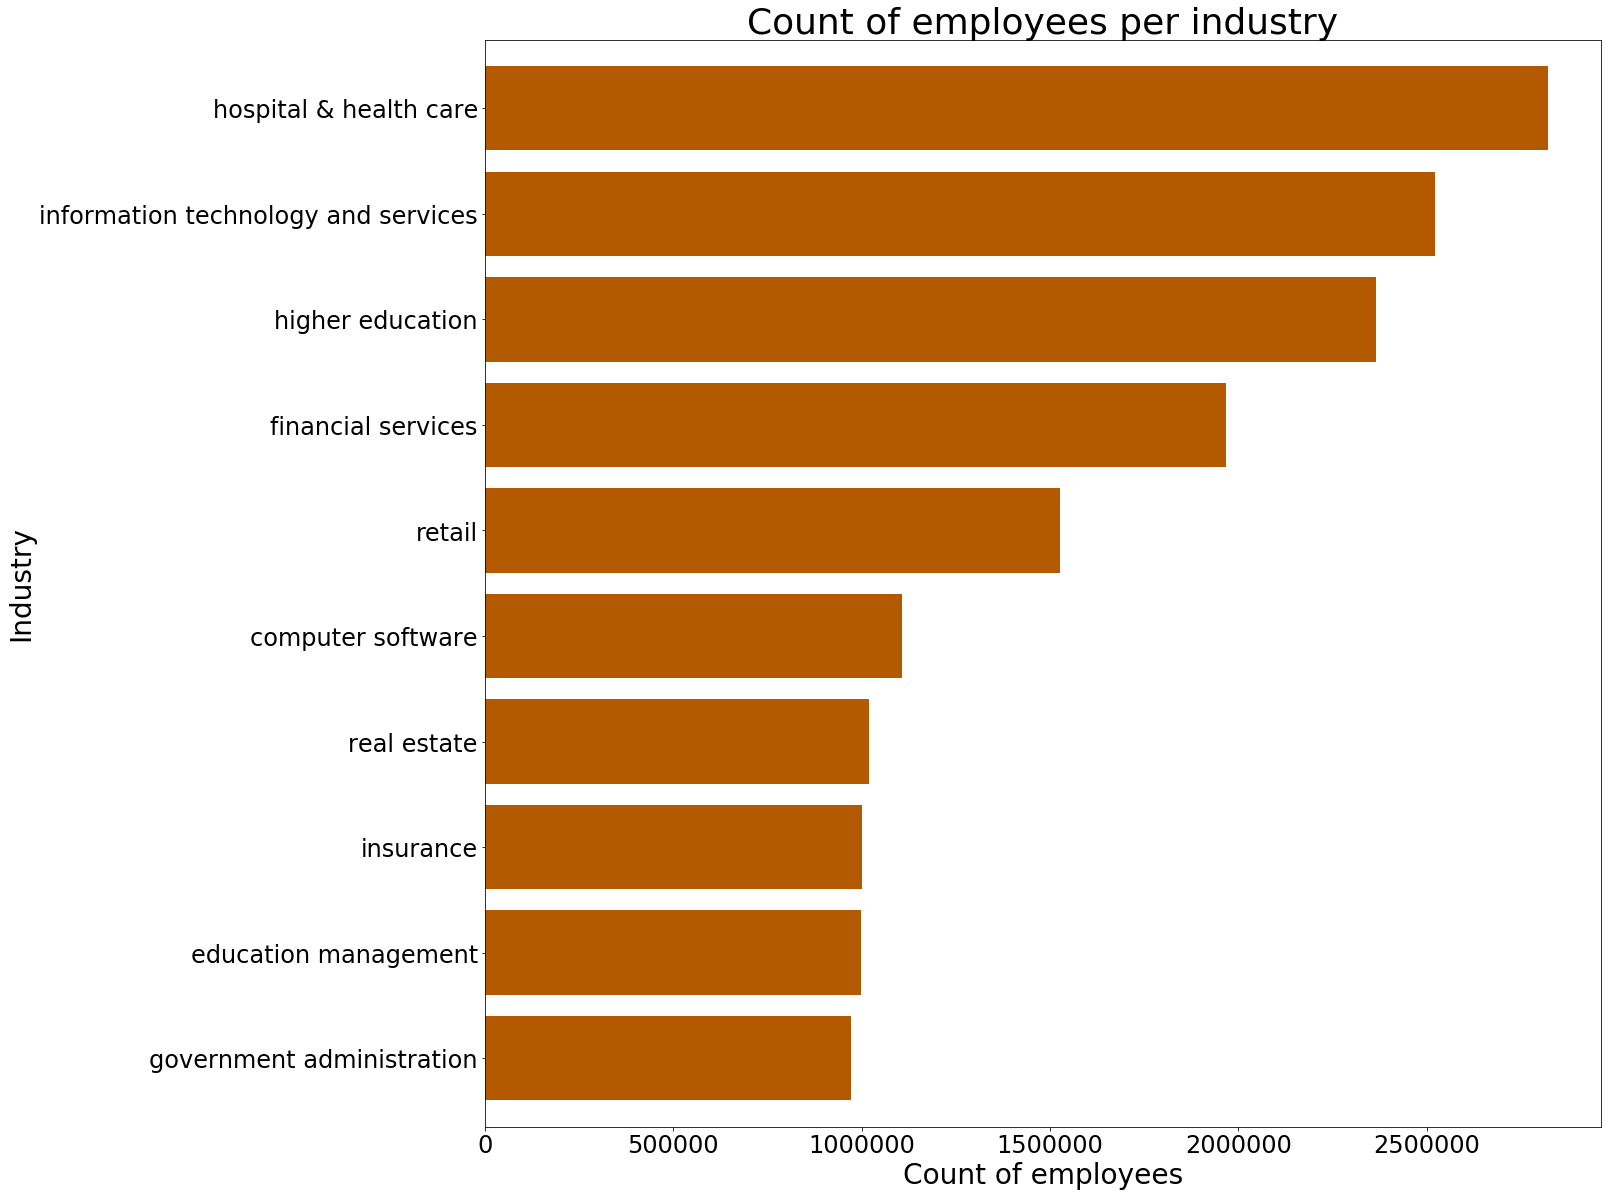

In [84]:
# Realizamos una gráfica de industria vs cantidad de empleados en Estados Unidos
sum_employees_per_industry_in_usa_collect  = sum_employees_per_industry_in_usa.collect()
employees_usa_items = [item[0] for item in sum_employees_per_industry_in_usa_collect]
count_items = [item[1] for item in sum_employees_per_industry_in_usa_collect]
sum_employees_per_industry_in_usa_collect = {"employees" : employees_usa_items, "count": count_items}
sum_employees_per_industry_usa_df = pd.DataFrame(sum_employees_per_industry_in_usa_collect)
sum_employees_per_industry_usa_df = sum_employees_per_industry_usa_df.sort_values(by = "count", ascending  = False)
sum_employees_per_industry_usa_df = sum_employees_per_industry_usa_df.iloc[:10]

myplot = sum_employees_per_industry_usa_df.plot(figsize = (20,20), kind = "barh", color = "#b35900", width = 0.8,
                               x = "employees", y = "count", legend = False)

myplot.invert_yaxis()

plt.xlabel("Count of employees", fontsize = 28)
plt.ylabel("Industry", fontsize = 28)
plt.title("Count of employees per industry", fontsize = 36)
plt.xticks(size = 24)
plt.yticks(size = 24)
plt.show()

### Analizar tendencia de qué industria creó mas empresas por períodos, a nivel global

#### Antes de 1980

In [85]:
count_per_industry_before_1980 = companies.where(companies["year founded"] < 1980).groupBy("industry").count()

In [86]:
count_per_industry_before_1980.show()

+--------------------+-----+
|            industry|count|
+--------------------+-----+
|aviation & aerospace| 1421|
|glass, ceramics &...|  651|
|     pharmaceuticals| 1719|
|recreational faci...| 1337|
|     defense & space|  701|
|     broadcast media| 1245|
|             fishery|  110|
|           utilities| 1695|
|          publishing| 2476|
|          veterinary|  527|
|         think tanks|  246|
|          automotive| 9038|
|industrial automa...| 2422|
|packaging and con...| 2206|
|        law practice| 5596|
|               dairy|  315|
|         warehousing|  426|
|health, wellness ...| 2978|
|railroad manufacture|  170|
|           wholesale| 5098|
+--------------------+-----+
only showing top 20 rows



In [87]:
# Calculamos cuántas empresas se crearon para la industria que más empresas creó antes de 1980
count_industry_with_more_companies_founded_before_1980 = count_per_industry_before_1980.agg({"count" : "max"}).collect()[0][0]

In [88]:
print("La industria que más empresas fundó antes de 1980 fundó {} empresas".format(count_industry_with_more_companies_founded_before_1980))

La industria que más empresas fundó antes de 1980 fundó 18979 empresas


In [89]:
# Calculamos cual es la industria que más empresas creó antes de 1980
count_per_industry_before_1980.where((count_per_industry_before_1980["count"] == count_industry_with_more_companies_founded_before_1980)).show()

+------------+-----+
|    industry|count|
+------------+-----+
|construction|18979|
+------------+-----+



#### => La industria que más empresas fundó antes de 1980 fue Construcción

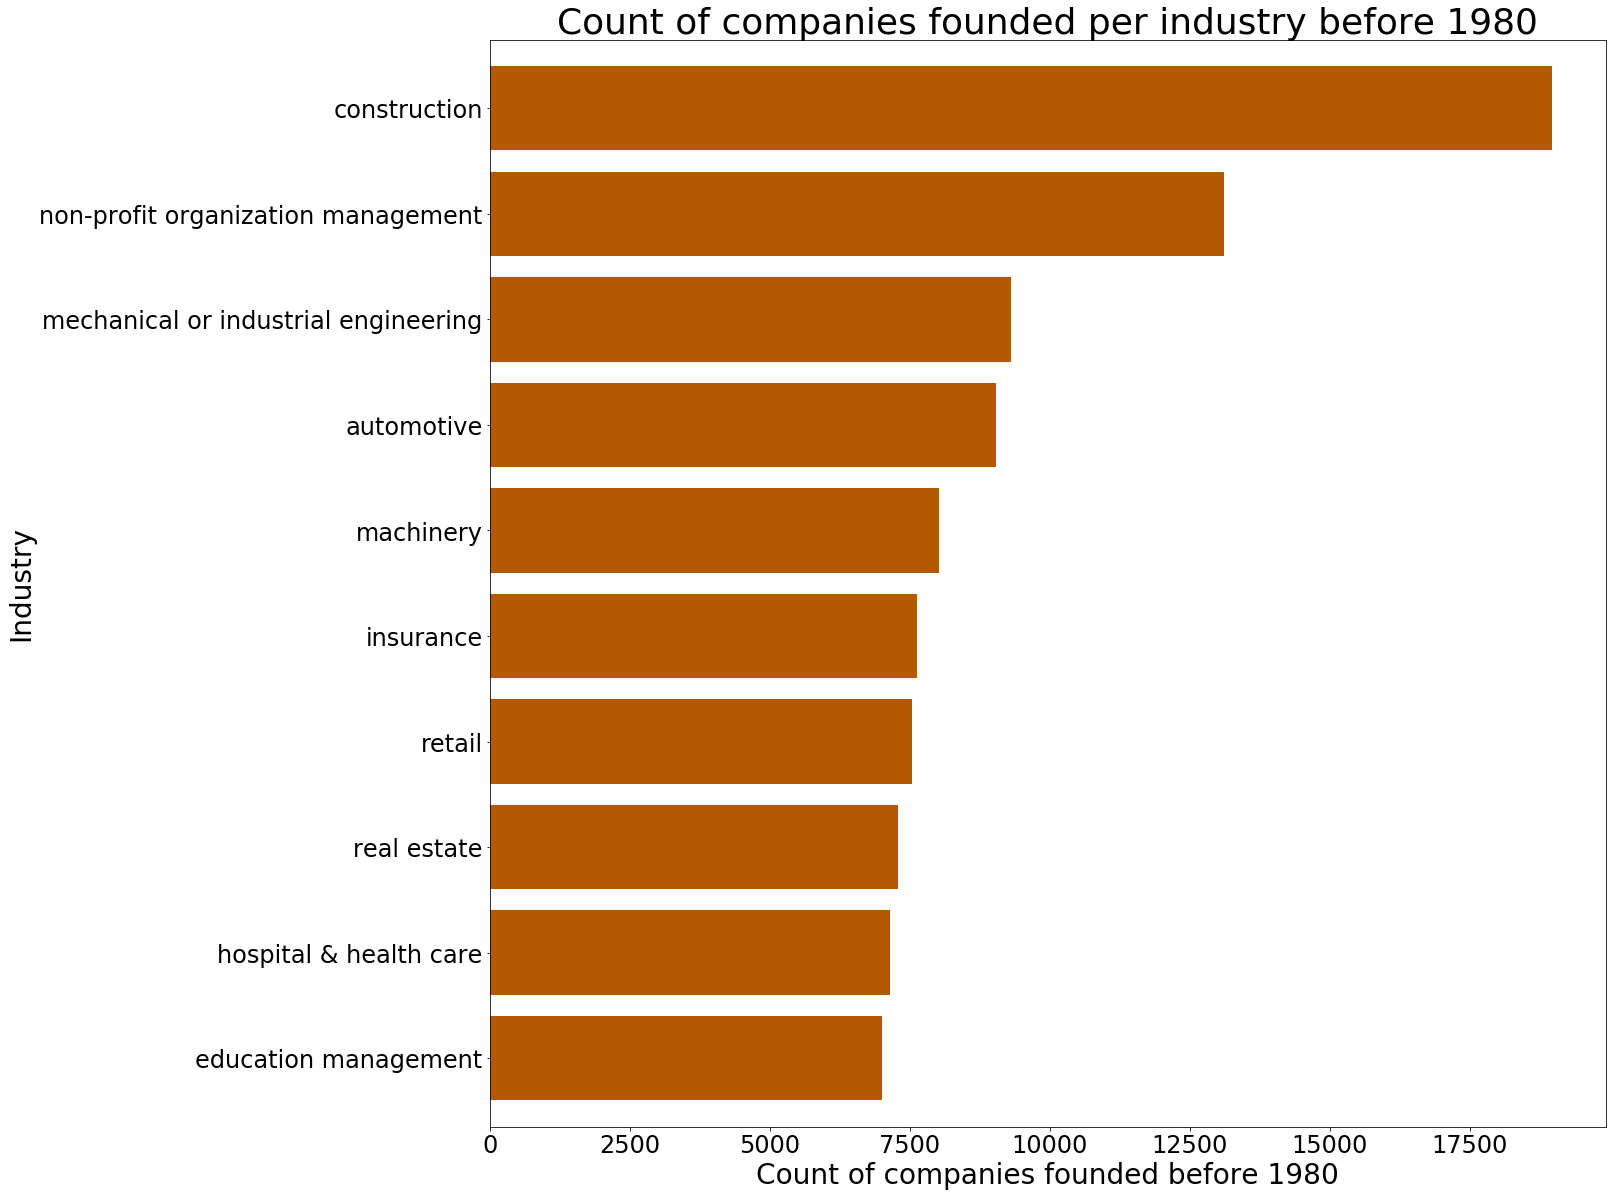

In [90]:
# Realizamos una gráfica de industria vs cantidad de empresas fundadas antes de 1980
count_per_industry_before_1980_collect  = count_per_industry_before_1980.collect()
industry_items = [item[0] for item in count_per_industry_before_1980_collect]
count_items = [item[1] for item in count_per_industry_before_1980_collect]
count_per_industry_before_1980_collect = {"industries" : industry_items, "count": count_items}
count_per_industry_before_1980_df = pd.DataFrame(count_per_industry_before_1980_collect)
count_per_industry_before_1980_df = count_per_industry_before_1980_df.sort_values(by = "count", ascending  = False)
count_per_industry_before_1980_df = count_per_industry_before_1980_df.iloc[:10]

myplot = count_per_industry_before_1980_df.plot(figsize = (20,20), kind = "barh", color = "#b35900", width = 0.8,
                               x = "industries", y = "count", legend = False)

myplot.invert_yaxis()

plt.xlabel("Count of companies founded before 1980", fontsize = 28)
plt.ylabel("Industry", fontsize = 28)
plt.title("Count of companies founded per industry before 1980", fontsize = 36)
plt.xticks(size = 24)
plt.yticks(size = 24)
plt.show()

#### Entre 1980 y 2000

In [91]:
count_per_industry_between_1980_and_2000 = companies.where((companies["year founded"] >= 1980) & (companies["year founded"] < 2000)).groupBy("industry").count()

In [92]:
count_per_industry_between_1980_and_2000.show()

+--------------------+-----+
|            industry|count|
+--------------------+-----+
|aviation & aerospace| 1882|
|glass, ceramics &...|  647|
|     pharmaceuticals| 3424|
|recreational faci...| 1212|
|     defense & space| 1147|
|     broadcast media| 2869|
|             fishery|  215|
|           utilities| 1573|
|          publishing| 4481|
|          veterinary|  976|
|         think tanks|  609|
|          automotive|10219|
|industrial automa...| 4709|
|packaging and con...| 2521|
|        law practice| 8470|
|               dairy|  245|
|         warehousing|  568|
|health, wellness ...| 9532|
|railroad manufacture|  158|
|           wholesale| 5873|
+--------------------+-----+
only showing top 20 rows



In [93]:
# Calculamos cuántas empresas se crearon para la industria que más empresas creó entre 1980 y 2000
count_industry_with_more_companies_founded_between_1980_and_2000 = count_per_industry_between_1980_and_2000.agg({"count" : "max"}).collect()[0][0]

In [94]:
print("La industria que más empresas fundó entre 1980 y 2000 fundó {} empresas".format(count_industry_with_more_companies_founded_between_1980_and_2000))

La industria que más empresas fundó entre 1980 y 2000 fundó 40097 empresas


In [95]:
# Calculamos cual es la industria que más empresas creó entre 1980 y 2000
count_per_industry_between_1980_and_2000.where((count_per_industry_between_1980_and_2000["count"] == count_industry_with_more_companies_founded_between_1980_and_2000)).show()

+--------------------+-----+
|            industry|count|
+--------------------+-----+
|information techn...|40097|
+--------------------+-----+



#### => La industria que más empresas fundó entre 1980 y 2000 fue "Information Technology and Services"

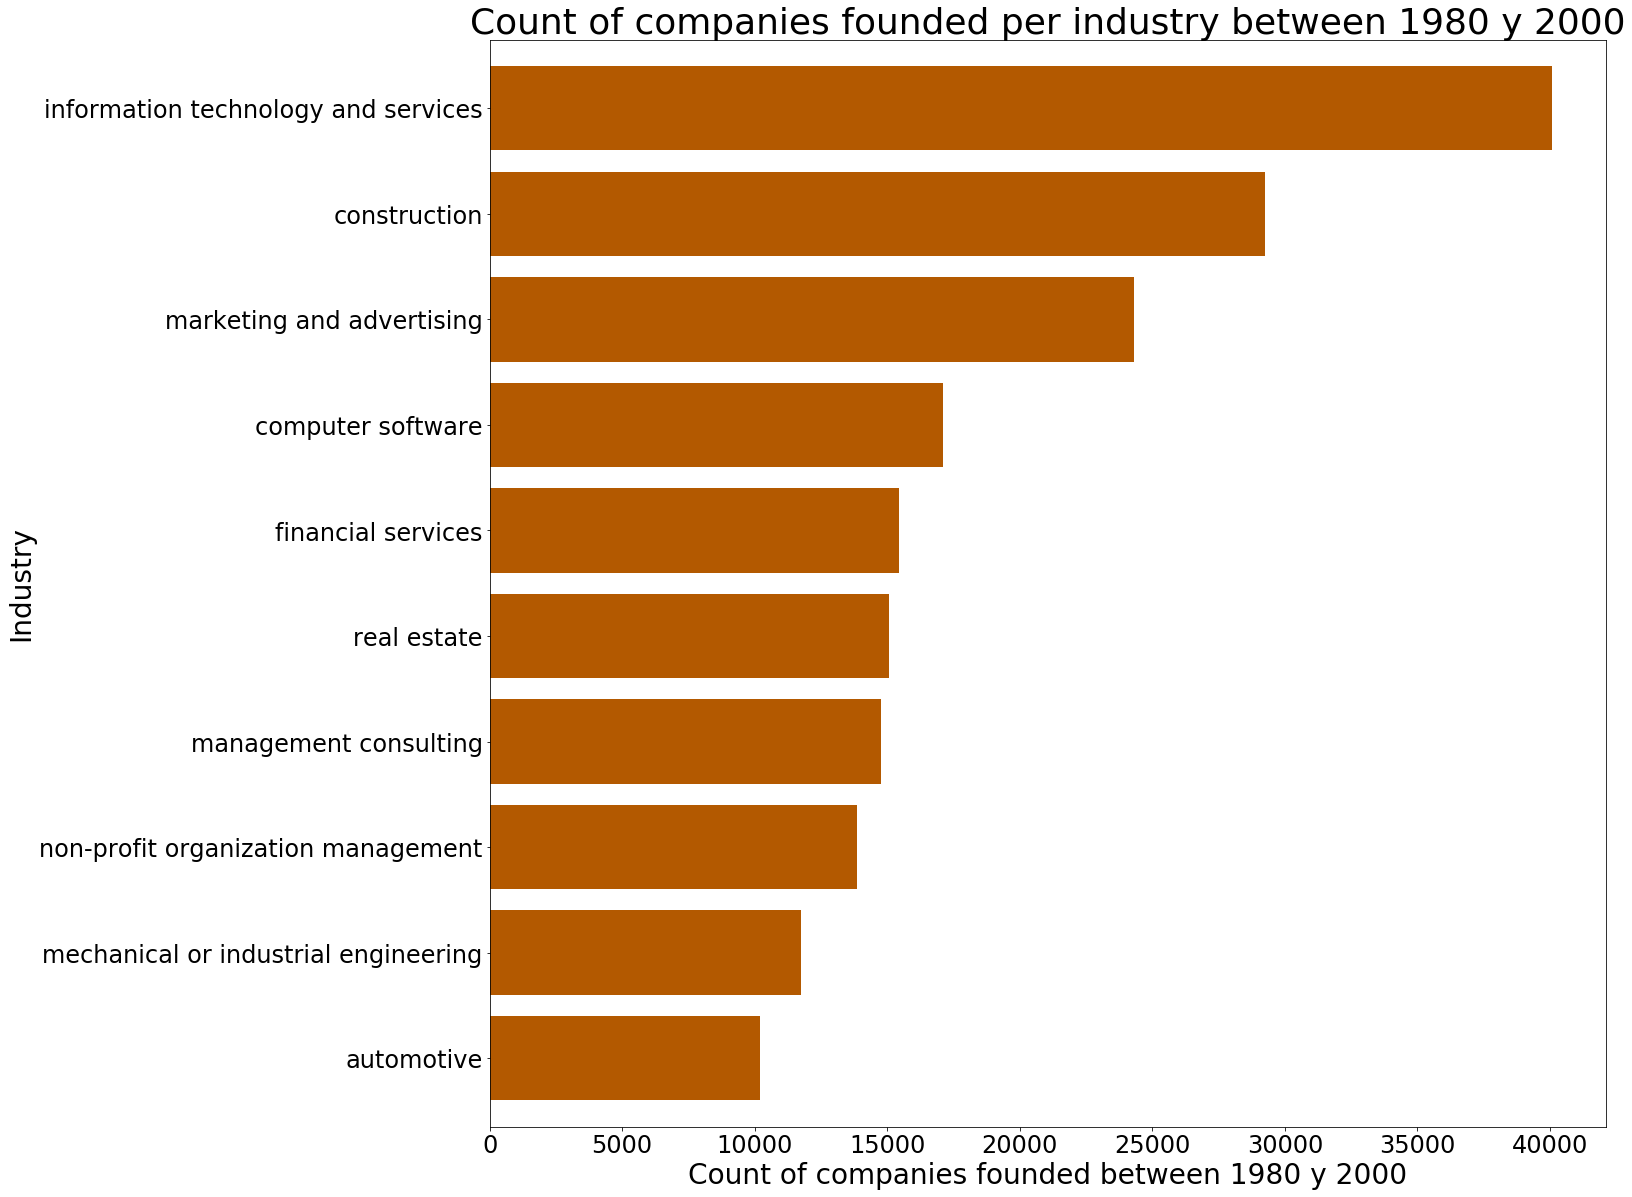

In [96]:
# Realizamos una gráfica de industria vs cantidad de empresas fundadas entre 1980 y 2000
count_per_industry_between_1980_and_2000_collect  = count_per_industry_between_1980_and_2000.collect()
industry_items = [item[0] for item in count_per_industry_between_1980_and_2000_collect]
count_items = [item[1] for item in count_per_industry_between_1980_and_2000_collect]
count_per_industry_between_1980_and_2000_collect = {"industries" : industry_items, "count": count_items}
count_per_industry_between_1980_and_2000_df = pd.DataFrame(count_per_industry_between_1980_and_2000_collect)
count_per_industry_between_1980_and_2000_df = count_per_industry_between_1980_and_2000_df.sort_values(by = "count", ascending  = False)
count_per_industry_between_1980_and_2000_df = count_per_industry_between_1980_and_2000_df.iloc[:10]

myplot = count_per_industry_between_1980_and_2000_df.plot(figsize = (20,20), kind = "barh", color = "#b35900", width = 0.8,
                               x = "industries", y = "count", legend = False)

myplot.invert_yaxis()

plt.xlabel("Count of companies founded between 1980 and 2000", fontsize = 28)
plt.ylabel("Industry", fontsize = 28)
plt.title("Count of companies founded per industry between 1980 and 2000", fontsize = 36)
plt.xticks(size = 24)
plt.yticks(size = 24)
plt.show()

#### Entre 2000 y 2022

In [97]:
count_per_industry_between_2000_and_2022 = companies.where((companies["year founded"] >= 2000) & (companies["year founded"] <= 2022)).groupBy("industry").count()

In [98]:
count_per_industry_between_2000_and_2022.show()

+--------------------+-----+
|            industry|count|
+--------------------+-----+
|aviation & aerospace| 6059|
|glass, ceramics &...|  988|
|     pharmaceuticals|10356|
|recreational faci...| 3886|
|     broadcast media|12158|
|     defense & space| 3472|
|             fishery|  504|
|           utilities| 4851|
|          publishing|18045|
|          veterinary| 2533|
|         think tanks| 4528|
|          automotive|22611|
|industrial automa...| 8252|
|packaging and con...| 2996|
|        law practice|23729|
|               dairy|  391|
|         warehousing| 1125|
|health, wellness ...|63174|
|railroad manufacture|  281|
|           wholesale|10062|
+--------------------+-----+
only showing top 20 rows



In [99]:
# Calculamos cuántas empresas se crearon para la industria que más empresas creó entre 2000 y 2022
count_industry_with_more_companies_founded_between_2000_and_2022 = count_per_industry_between_2000_and_2022.agg({"count" : "max"}).collect()[0][0]

In [100]:
print("La industria que más empresas fundó entre 2000 y 2022 fundó {} empresas".format(count_industry_with_more_companies_founded_between_2000_and_2022))

La industria que más empresas fundó entre 2000 y 2022 fundó 244582 empresas


In [101]:
# Calculamos cual es la industria que más empresas creó entre 2000 y 2022
count_per_industry_between_2000_and_2022.where((count_per_industry_between_2000_and_2022["count"] == count_industry_with_more_companies_founded_between_2000_and_2022)).show()

+--------------------+------+
|            industry| count|
+--------------------+------+
|information techn...|244582|
+--------------------+------+



#### => La industria que más empresas fundó entre 2000 y 2022 fue "Information Technology and Services"

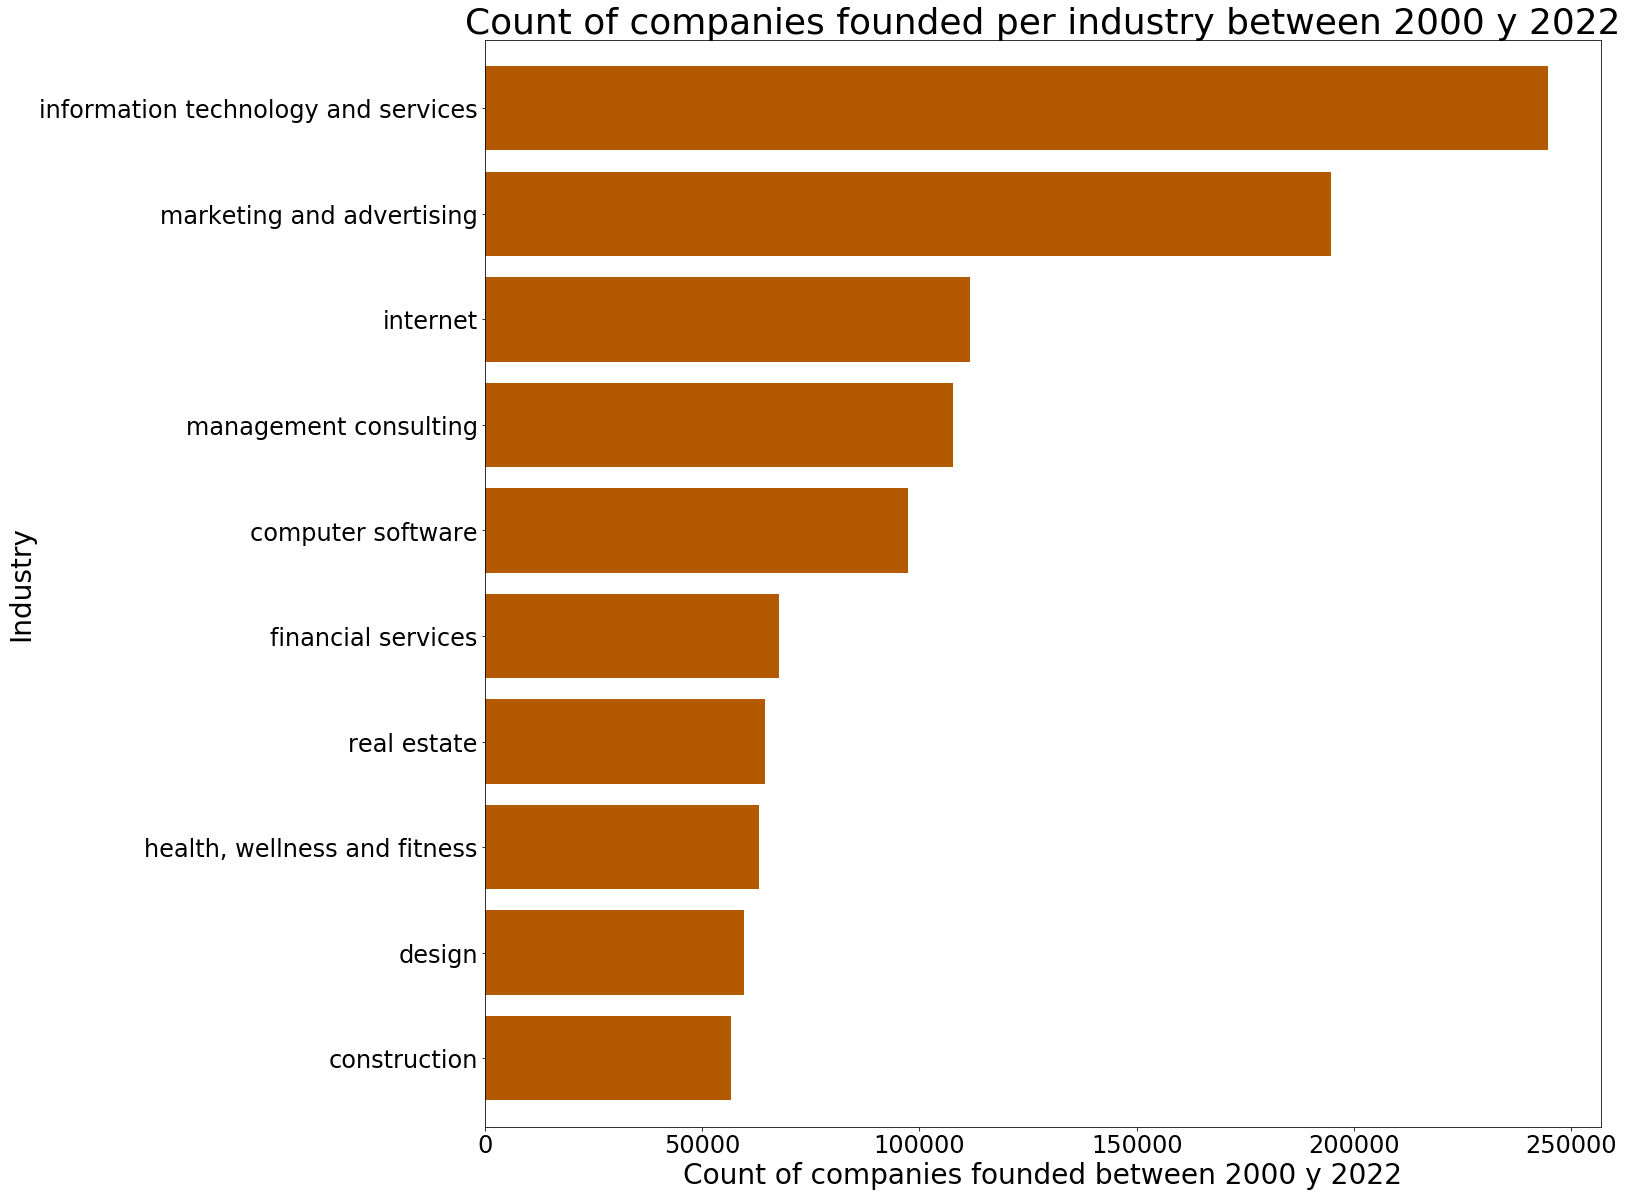

In [102]:
# Realizamos una gráfica de industria vs cantidad de empresas fundadas entre 2000 y 2022
count_per_industry_between_2000_and_2022_collect  = count_per_industry_between_2000_and_2022.collect()
industry_items = [item[0] for item in count_per_industry_between_2000_and_2022_collect]
count_items = [item[1] for item in count_per_industry_between_2000_and_2022_collect]
count_per_industry_between_2000_and_2022_collect = {"industries" : industry_items, "count": count_items}
count_per_industry_between_2000_and_2022_df = pd.DataFrame(count_per_industry_between_2000_and_2022_collect)
count_per_industry_between_2000_and_2022_df = count_per_industry_between_2000_and_2022_df.sort_values(by = "count", ascending  = False)
count_per_industry_between_2000_and_2022_df = count_per_industry_between_2000_and_2022_df.iloc[:10]

myplot = count_per_industry_between_2000_and_2022_df.plot(figsize = (20,20), kind = "barh", color = "#b35900", width = 0.8,
                               x = "industries", y = "count", legend = False)

myplot.invert_yaxis()

plt.xlabel("Count of companies founded between 2000 and 2022", fontsize = 28)
plt.ylabel("Industry", fontsize = 28)
plt.title("Count of companies founded per industry between 2000 and 2022", fontsize = 36)
plt.xticks(size = 24)
plt.yticks(size = 24)
plt.show()

### Analizar tendencia de qué industria creó mas empresas por períodos, en Uruguay

#### Antes de 1980

In [103]:
count_per_industry_before_1980_in_uruguay = companies.where((companies["year founded"] < 1980) & (companies["country"] == "uruguay")).groupBy("industry").count()

In [104]:
count_per_industry_before_1980_in_uruguay.show()

+--------------------+-----+
|            industry|count|
+--------------------+-----+
|     pharmaceuticals|    6|
|     broadcast media|    5|
|           utilities|    2|
|          veterinary|    2|
|          automotive|    5|
|industrial automa...|    2|
|        law practice|    1|
|health, wellness ...|    4|
|           wholesale|    2|
|         real estate|    7|
|    food & beverages|   11|
|            research|    1|
|investment manage...|    1|
|transportation/tr...|    5|
|   apparel & fashion|    4|
|non-profit organi...|    3|
|  financial services|    5|
|marketing and adv...|    5|
|architecture & pl...|    4|
|     events services|    2|
+--------------------+-----+
only showing top 20 rows



In [105]:
# Calculamos cuántas empresas se crearon para la industria que más empresas creó en Uruguay antes de 1980
count_industry_with_more_companies_founded_before_1980_in_uruguay = count_per_industry_before_1980_in_uruguay.agg({"count" : "max"}).collect()[0][0]

In [106]:
print("La industria que más empresas fundó en Uruguay antes de 1980 fundó {} empresas".format(count_industry_with_more_companies_founded_before_1980_in_uruguay))

La industria que más empresas fundó en Uruguay antes de 1980 fundó 14 empresas


In [107]:
# Calculamos cual es la industria que más empresas creó antes de 1980 en Uruguay
count_per_industry_before_1980_in_uruguay.where((count_per_industry_before_1980_in_uruguay["count"] == count_industry_with_more_companies_founded_before_1980_in_uruguay)).show()

+--------------+-----+
|      industry|count|
+--------------+-----+
|legal services|   14|
+--------------+-----+



#### => La industria que más empresas fundó en Uruguay antes de 1980 fue "legal services"

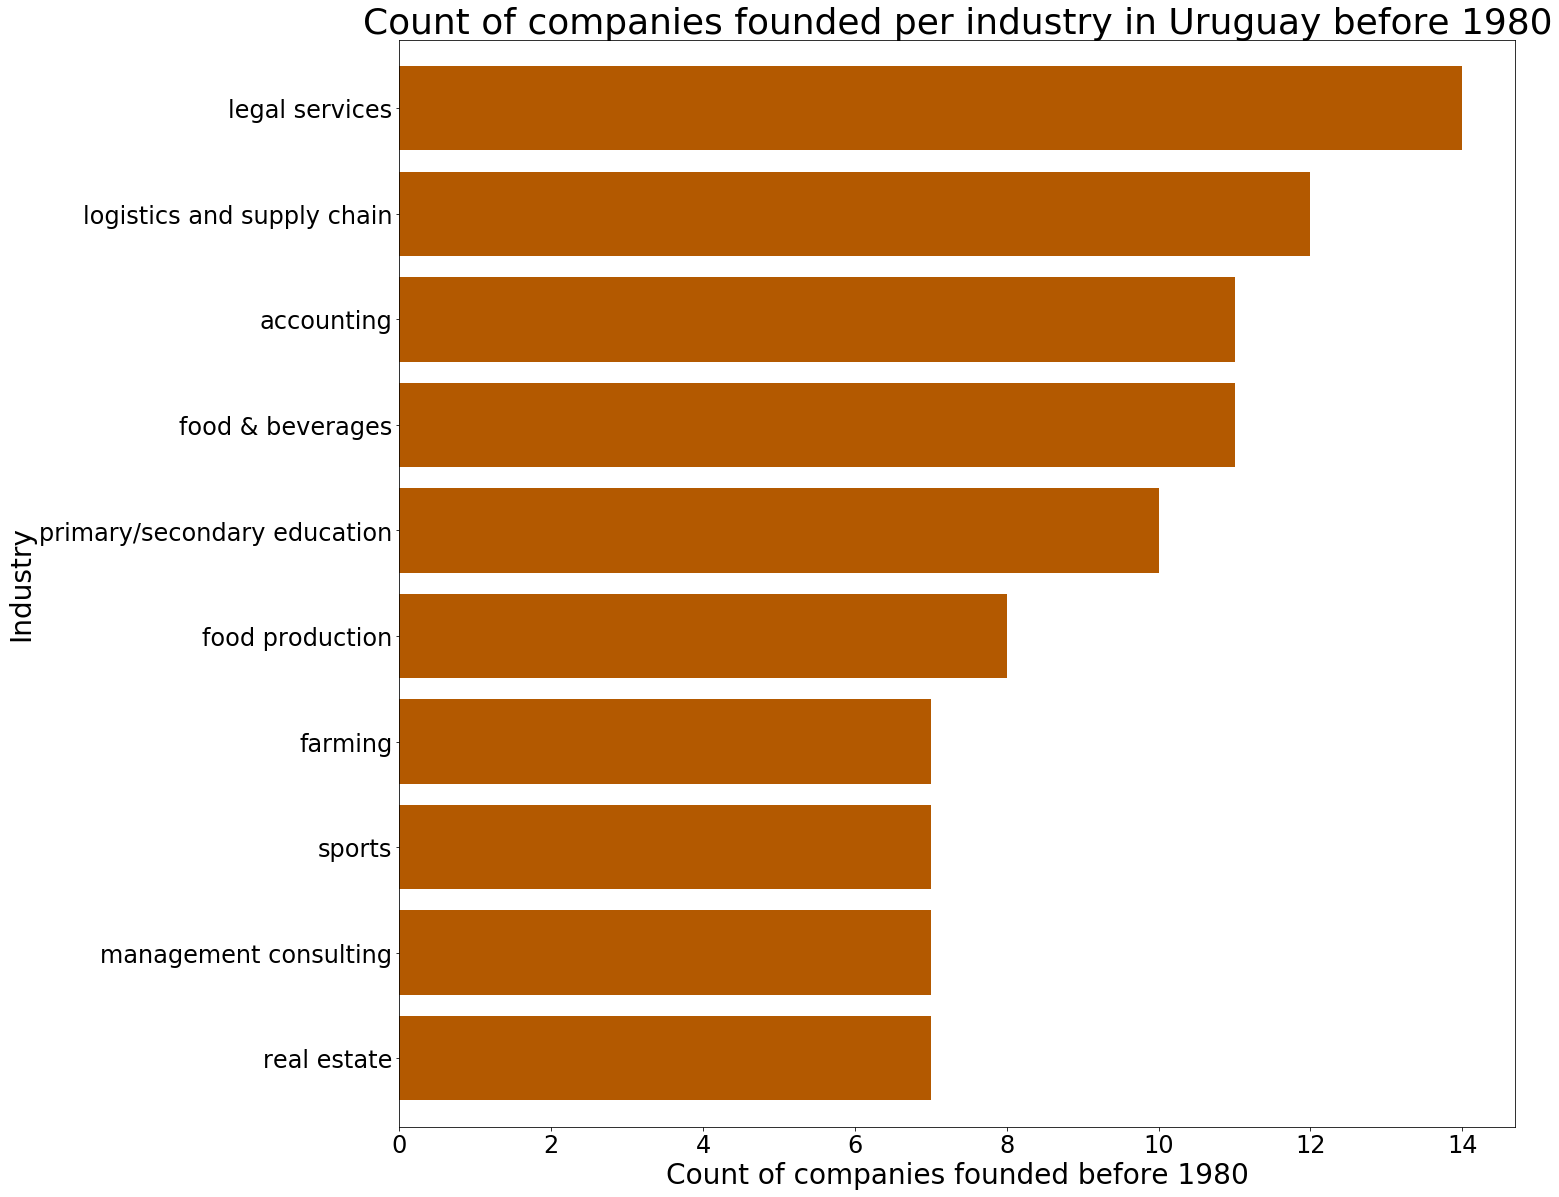

In [109]:
# Realizamos una gráfica de industria vs cantidad de empresas fundadas antes de 1980 en Uruguay
count_per_industry_before_1980_in_uruguay_collect  = count_per_industry_before_1980_in_uruguay.collect()
industry_items = [item[0] for item in count_per_industry_before_1980_in_uruguay_collect]
count_items = [item[1] for item in count_per_industry_before_1980_in_uruguay_collect]
count_per_industry_before_1980_in_uruguay_collect = {"industries" : industry_items, "count": count_items}
count_per_industry_before_1980_in_uruguay_df = pd.DataFrame(count_per_industry_before_1980_in_uruguay_collect)
count_per_industry_before_1980_in_uruguay_df = count_per_industry_before_1980_in_uruguay_df.sort_values(by = "count", ascending  = False)
count_per_industry_before_1980_in_uruguay_df = count_per_industry_before_1980_in_uruguay_df.iloc[:10]

myplot = count_per_industry_before_1980_in_uruguay_df.plot(figsize = (20,20), kind = "barh", color = "#b35900", width = 0.8,
                               x = "industries", y = "count", legend = False)

myplot.invert_yaxis()

plt.xlabel("Count of companies founded before 1980", fontsize = 28)
plt.ylabel("Industry", fontsize = 28)
plt.title("Count of companies founded per industry in Uruguay before 1980", fontsize = 36)
plt.xticks(size = 24)
plt.yticks(size = 24)
plt.show()

#### Entre 1980 y 2000

In [110]:
count_per_industry_between_1980_and_2000_in_uruguay = companies.where((companies["year founded"] >= 1980) & (companies["year founded"] < 2000) & (companies["country"] == "uruguay")).groupBy("industry").count()

In [111]:
count_per_industry_between_1980_and_2000_in_uruguay.show()

+--------------------+-----+
|            industry|count|
+--------------------+-----+
|aviation & aerospace|    1|
|     pharmaceuticals|    3|
|     broadcast media|    3|
|          automotive|    4|
|industrial automa...|    1|
|packaging and con...|    1|
|        law practice|    5|
|               dairy|    1|
|         warehousing|    1|
|health, wellness ...|    4|
|           wholesale|    8|
|environmental ser...|    2|
|         real estate|   23|
| program development|    2|
|outsourcing/offsh...|    2|
|    food & beverages|    5|
| computer networking|    2|
|            research|    1|
|investment manage...|    1|
|transportation/tr...|    2|
+--------------------+-----+
only showing top 20 rows



In [112]:
# Calculamos cuántas empresas se crearon para la industria que más empresas creó en Uruguay entre 1980 y 2000
count_industry_with_more_companies_founded_between_1980_and_2000_in_uruguay = count_per_industry_between_1980_and_2000_in_uruguay.agg({"count" : "max"}).collect()[0][0]

In [113]:
print("La industria que más empresas fundó en Uruguay entre 1980 y 2000 fundó {} empresas".format(count_industry_with_more_companies_founded_between_1980_and_2000_in_uruguay))

La industria que más empresas fundó en Uruguay entre 1980 y 2000 fundó 51 empresas


In [114]:
# Calculamos cual es la industria que más empresas creó entre 1980 y 2000 en Uruguay
count_per_industry_between_1980_and_2000_in_uruguay.where((count_per_industry_between_1980_and_2000_in_uruguay["count"] == count_industry_with_more_companies_founded_between_1980_and_2000_in_uruguay)).show()

+--------------------+-----+
|            industry|count|
+--------------------+-----+
|information techn...|   51|
+--------------------+-----+



#### => La industria que más empresas fundó en Uruguay entre 1980 y 2000 fue "information technology and services"

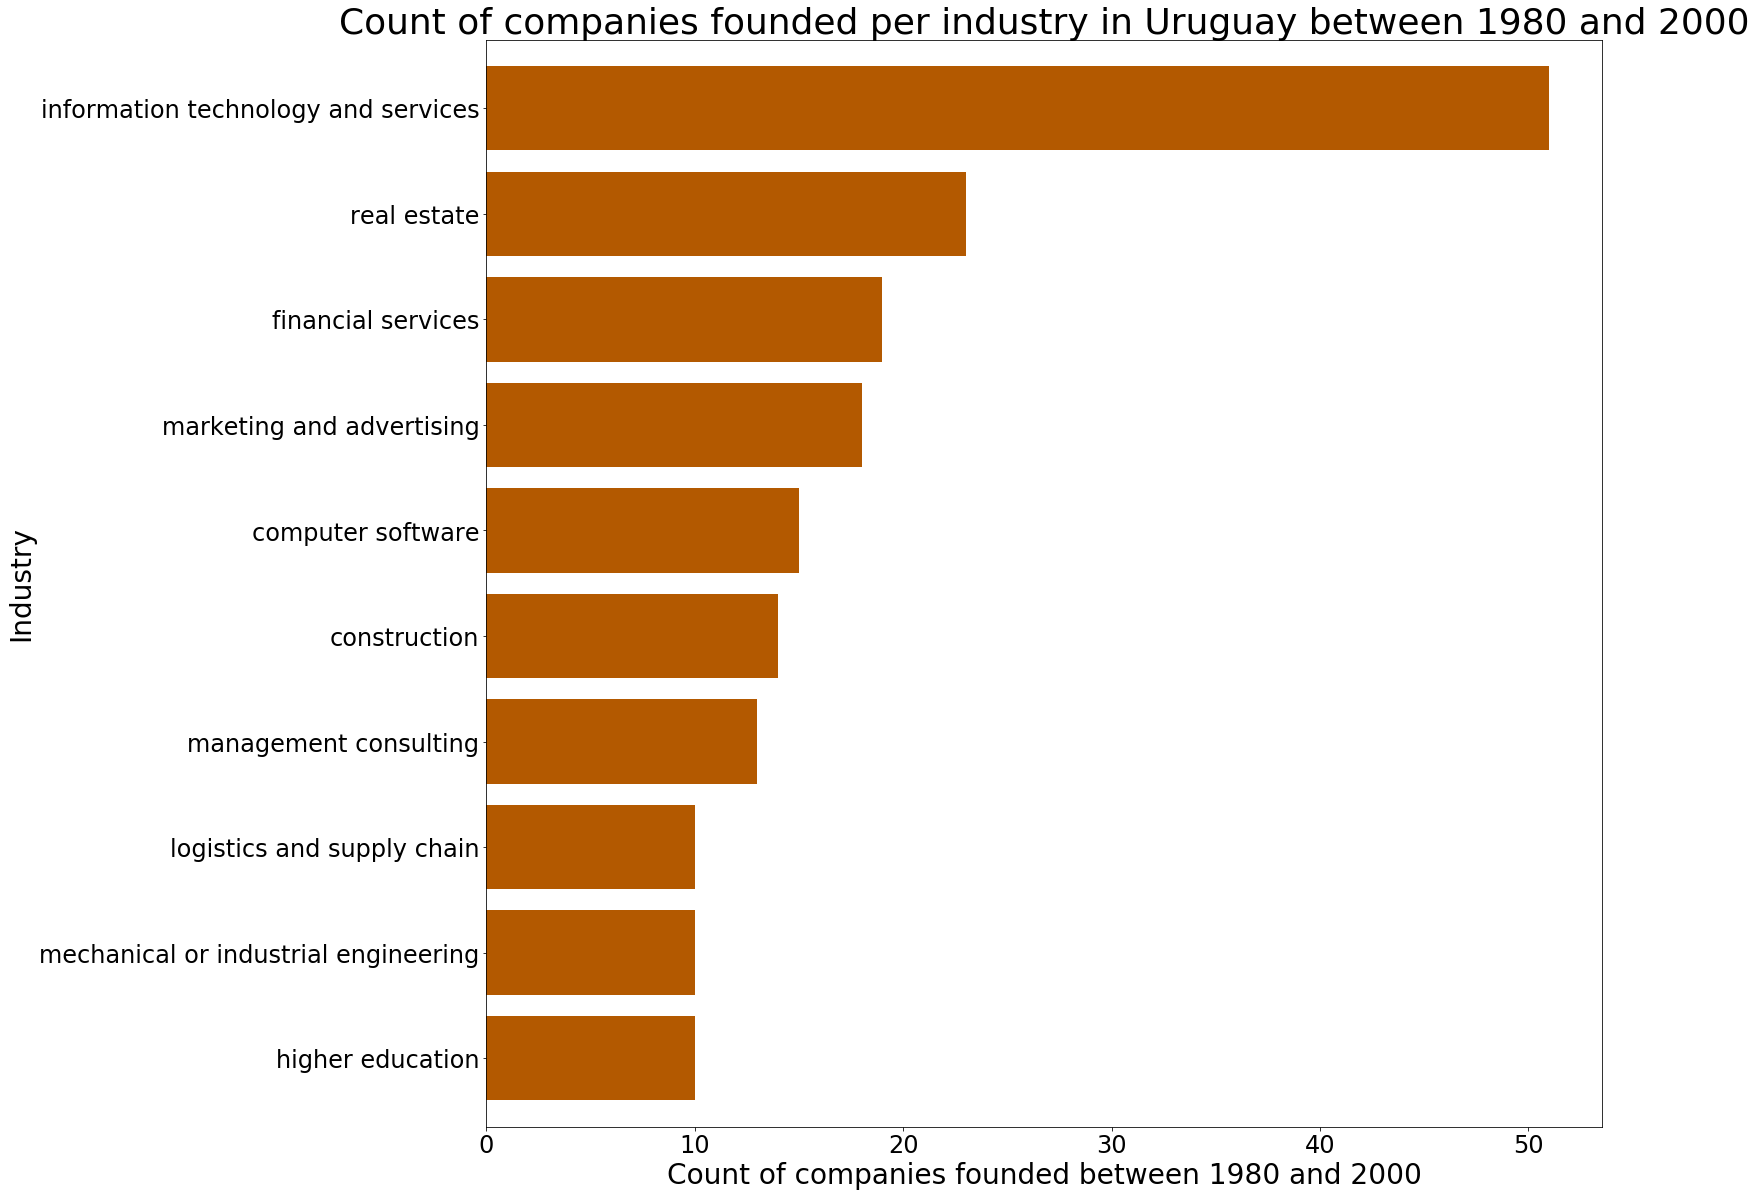

In [115]:
# Realizamos una gráfica de industria vs cantidad de empresas fundadas entre 1980 y 2000 en Uruguay
count_per_industry_between_1980_and_2000_in_uruguay_collect  = count_per_industry_between_1980_and_2000_in_uruguay.collect()
industry_items = [item[0] for item in count_per_industry_between_1980_and_2000_in_uruguay_collect]
count_items = [item[1] for item in count_per_industry_between_1980_and_2000_in_uruguay_collect]
count_per_industry_between_1980_and_2000_in_uruguay_collect = {"industries" : industry_items, "count": count_items}
count_per_industry_between_1980_and_2000_in_uruguay_df = pd.DataFrame(count_per_industry_between_1980_and_2000_in_uruguay_collect)
count_per_industry_between_1980_and_2000_in_uruguay_df = count_per_industry_between_1980_and_2000_in_uruguay_df.sort_values(by = "count", ascending  = False)
count_per_industry_between_1980_and_2000_in_uruguay_df = count_per_industry_between_1980_and_2000_in_uruguay_df.iloc[:10]

myplot = count_per_industry_between_1980_and_2000_in_uruguay_df.plot(figsize = (20,20), kind = "barh", color = "#b35900", width = 0.8,
                               x = "industries", y = "count", legend = False)

myplot.invert_yaxis()

plt.xlabel("Count of companies founded between 1980 and 2000", fontsize = 28)
plt.ylabel("Industry", fontsize = 28)
plt.title("Count of companies founded per industry in Uruguay between 1980 and 2000", fontsize = 36)
plt.xticks(size = 24)
plt.yticks(size = 24)
plt.show()

#### Entre 2000 y 2022

In [116]:
count_per_industry_between_2000_and_2022_in_uruguay = companies.where((companies["year founded"] >= 2000) & (companies["year founded"] <= 20022) & (companies["country"] == "uruguay")).groupBy("industry").count()

In [117]:
count_per_industry_between_2000_and_2022_in_uruguay.show()

+--------------------+-----+
|            industry|count|
+--------------------+-----+
|     pharmaceuticals|    7|
|recreational faci...|    3|
|     broadcast media|   15|
|             fishery|    1|
|          publishing|    5|
|           utilities|    1|
|         think tanks|    3|
|          automotive|    6|
|industrial automa...|    6|
|packaging and con...|    5|
|        law practice|    7|
|         warehousing|    1|
|health, wellness ...|   21|
|           wholesale|   11|
|environmental ser...|    7|
|         real estate|   49|
| program development|   26|
|outsourcing/offsh...|   10|
|    food & beverages|   34|
|            research|    5|
+--------------------+-----+
only showing top 20 rows



In [118]:
# Calculamos cuántas empresas se crearon para la industria que más empresas creó en Uruguay entre 2000 y 2022
count_industry_with_more_companies_founded_between_2000_and_2022_in_uruguay = count_per_industry_between_2000_and_2022_in_uruguay.agg({"count" : "max"}).collect()[0][0]

In [119]:
print("La industria que más empresas fundó en Uruguay entre 2000 y 2022 fundó {} empresas".format(count_industry_with_more_companies_founded_between_2000_and_2022_in_uruguay))

La industria que más empresas fundó en Uruguay entre 2000 y 2022 fundó 257 empresas


In [120]:
# Calculamos cual es la industria que más empresas creó entre 2000 y 2022 en Uruguay
count_per_industry_between_2000_and_2022_in_uruguay.where((count_per_industry_between_2000_and_2022_in_uruguay["count"] == count_industry_with_more_companies_founded_between_2000_and_2022_in_uruguay)).show()

+--------------------+-----+
|            industry|count|
+--------------------+-----+
|information techn...|  257|
+--------------------+-----+



#### => La industria que más empresas fundó en Uruguay entre 2000 y 2022 fue "information technology and services"

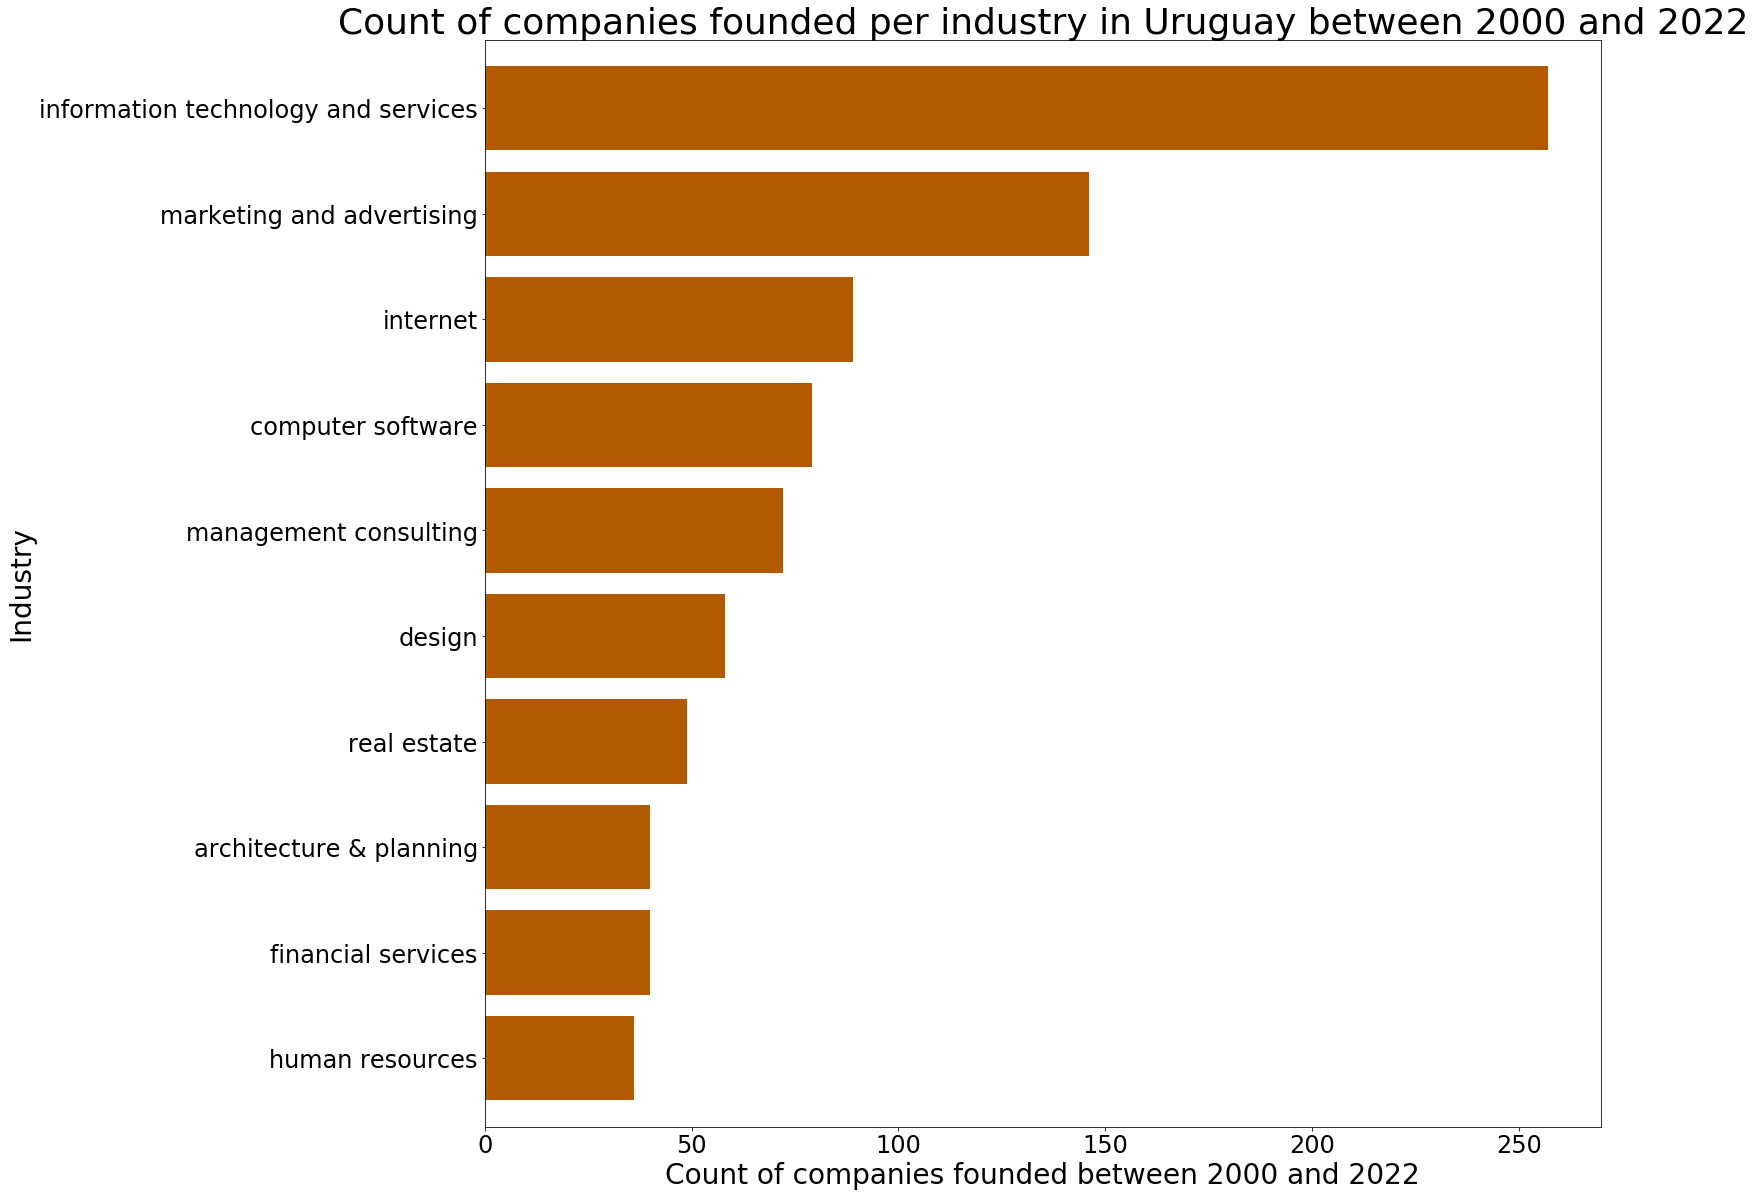

In [121]:
# Realizamos una gráfica de industria vs cantidad de empresas fundadas entre 2000 y 2022 en Uruguay
count_per_industry_between_2000_and_2022_in_uruguay_collect  = count_per_industry_between_2000_and_2022_in_uruguay.collect()
industry_items = [item[0] for item in count_per_industry_between_2000_and_2022_in_uruguay_collect]
count_items = [item[1] for item in count_per_industry_between_2000_and_2022_in_uruguay_collect]
count_per_industry_between_2000_and_2022_in_uruguay_collect = {"industries" : industry_items, "count": count_items}
count_per_industry_between_2000_and_2022_in_uruguay_df = pd.DataFrame(count_per_industry_between_2000_and_2022_in_uruguay_collect)
count_per_industry_between_2000_and_2022_in_uruguay_df = count_per_industry_between_2000_and_2022_in_uruguay_df.sort_values(by = "count", ascending  = False)
count_per_industry_between_2000_and_2022_in_uruguay_df = count_per_industry_between_2000_and_2022_in_uruguay_df.iloc[:10]

myplot = count_per_industry_between_2000_and_2022_in_uruguay_df.plot(figsize = (20,20), kind = "barh", color = "#b35900", width = 0.8,
                               x = "industries", y = "count", legend = False)

myplot.invert_yaxis()

plt.xlabel("Count of companies founded between 2000 and 2022", fontsize = 28)
plt.ylabel("Industry", fontsize = 28)
plt.title("Count of companies founded per industry in Uruguay between 2000 and 2022", fontsize = 36)
plt.xticks(size = 24)
plt.yticks(size = 24)
plt.show()

### Analizar tendencia de qué industria creó mas empresas por períodos, en Estados Unidos

#### Antes de 1980

In [122]:
count_per_industry_before_1980_in_usa = companies.where((companies["year founded"] < 1980) & (companies["country"] == "united states")).groupBy("industry").count()

In [123]:
count_per_industry_before_1980_in_usa.show()

+--------------------+-----+
|            industry|count|
+--------------------+-----+
|aviation & aerospace|  821|
|glass, ceramics &...|  176|
|     pharmaceuticals|  375|
|recreational faci...|  861|
|     defense & space|  399|
|     broadcast media|  681|
|             fishery|   29|
|           utilities|  986|
|          publishing|  988|
|          veterinary|  336|
|         think tanks|   76|
|          automotive| 3431|
|industrial automa...|  941|
|packaging and con...|  910|
|        law practice| 3129|
|               dairy|   91|
|         warehousing|  244|
|health, wellness ...| 1394|
|railroad manufacture|   50|
|           wholesale| 2163|
+--------------------+-----+
only showing top 20 rows



In [124]:
# Calculamos cuántas empresas se crearon para la industria que más empresas creó en Estados Undidos antes de 1980
count_industry_with_more_companies_founded_before_1980_in_usa = count_per_industry_before_1980_in_usa.agg({"count" : "max"}).collect()[0][0]

In [125]:
print("La industria que más empresas fundó en Estados Unidos antes de 1980 fundó {} empresas".format(count_industry_with_more_companies_founded_before_1980_in_usa))

La industria que más empresas fundó en Estados Unidos antes de 1980 fundó 9180 empresas


In [126]:
# Calculamos cual es la industria que más empresas creó antes de 1980 en Estados Unidos
count_per_industry_before_1980_in_usa.where((count_per_industry_before_1980_in_usa["count"] == count_industry_with_more_companies_founded_before_1980_in_usa)).show()

+------------+-----+
|    industry|count|
+------------+-----+
|construction| 9180|
+------------+-----+



#### => La industria que más empresas fundó en Estados Unidos antes de 1980 fue "construction"

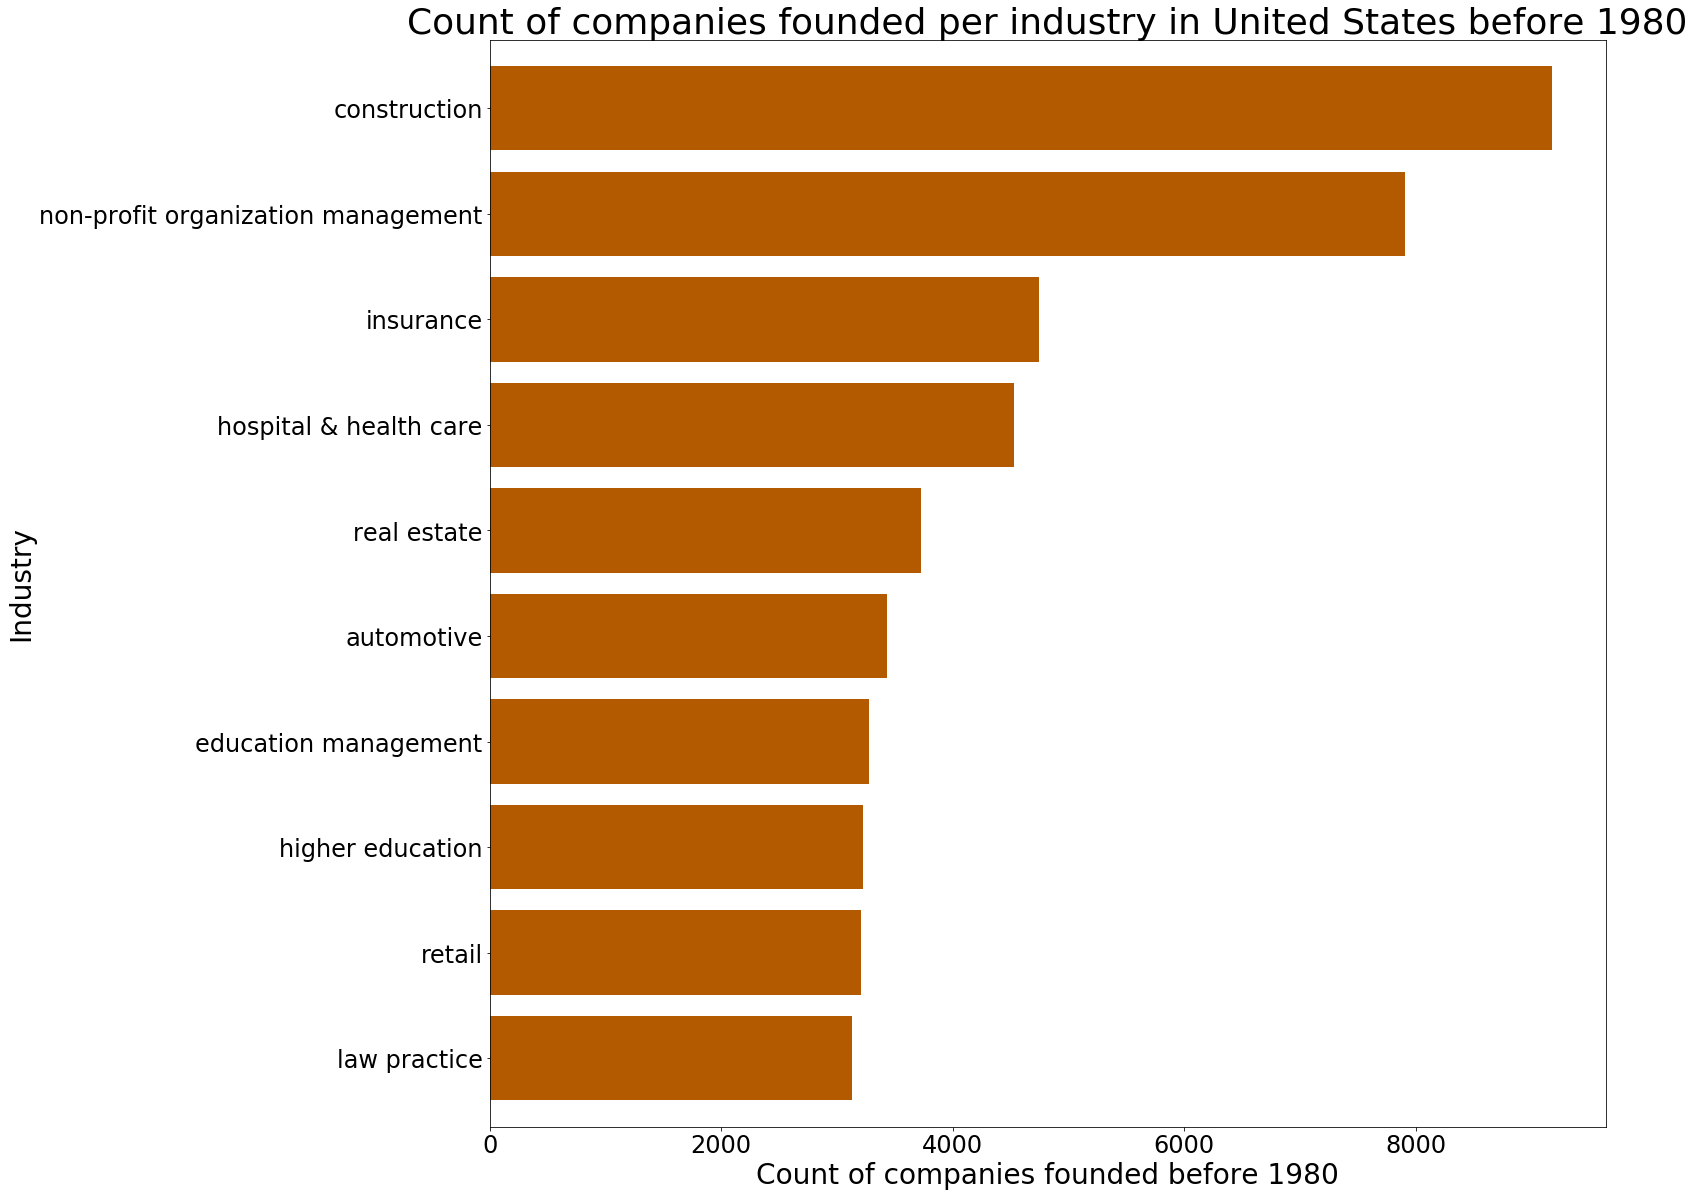

In [127]:
# Realizamos una gráfica de industria vs cantidad de empresas fundadas antes de 1980 en Estados Unidos
count_per_industry_before_1980_in_usa_collect  = count_per_industry_before_1980_in_usa.collect()
industry_items = [item[0] for item in count_per_industry_before_1980_in_usa_collect]
count_items = [item[1] for item in count_per_industry_before_1980_in_usa_collect]
count_per_industry_before_1980_in_usa_collect = {"industries" : industry_items, "count": count_items}
count_per_industry_before_1980_in_usa_df = pd.DataFrame(count_per_industry_before_1980_in_usa_collect)
count_per_industry_before_1980_in_usa_df = count_per_industry_before_1980_in_usa_df.sort_values(by = "count", ascending  = False)
count_per_industry_before_1980_in_usa_df = count_per_industry_before_1980_in_usa_df.iloc[:10]

myplot = count_per_industry_before_1980_in_usa_df.plot(figsize = (20,20), kind = "barh", color = "#b35900", width = 0.8,
                               x = "industries", y = "count", legend = False)

myplot.invert_yaxis()

plt.xlabel("Count of companies founded before 1980", fontsize = 28)
plt.ylabel("Industry", fontsize = 28)
plt.title("Count of companies founded per industry in United States before 1980", fontsize = 36)
plt.xticks(size = 24)
plt.yticks(size = 24)
plt.show()

#### Entre 1980 y 2000

In [128]:
count_per_industry_between_1980_and_2000_in_usa = companies.where((companies["year founded"] >= 1980) & (companies["year founded"] < 2000) & (companies["country"] == "united states")).groupBy("industry").count()

In [129]:
count_per_industry_between_1980_and_2000_in_usa.show()

+--------------------+-----+
|            industry|count|
+--------------------+-----+
|aviation & aerospace|  923|
|glass, ceramics &...|  170|
|     pharmaceuticals|  997|
|recreational faci...|  587|
|     broadcast media|  968|
|     defense & space|  724|
|             fishery|   52|
|           utilities|  547|
|          publishing| 1606|
|          veterinary|  492|
|         think tanks|  173|
|          automotive| 3546|
|industrial automa...| 1201|
|packaging and con...|  801|
|        law practice| 5014|
|               dairy|   57|
|         warehousing|  268|
|health, wellness ...| 4279|
|railroad manufacture|   43|
|           wholesale| 1878|
+--------------------+-----+
only showing top 20 rows



In [130]:
# Calculamos cuántas empresas se crearon para la industria que más empresas creó en Estados Unidos entre 1980 y 2000
count_industry_with_more_companies_founded_between_1980_and_2000_in_usa = count_per_industry_between_1980_and_2000_in_usa.agg({"count" : "max"}).collect()[0][0]

In [131]:
print("La industria que más empresas fundó en Estados Unidos entre 1980 y 2000 fundó {} empresas".format(count_industry_with_more_companies_founded_between_1980_and_2000_in_usa))

La industria que más empresas fundó en Estados Unidos entre 1980 y 2000 fundó 13453 empresas


In [132]:
# Calculamos cual es la industria que más empresas creó entre 1980 y 2000 en Estados Unidos
count_per_industry_between_1980_and_2000_in_usa.where((count_per_industry_between_1980_and_2000_in_usa["count"] == count_industry_with_more_companies_founded_between_1980_and_2000_in_usa)).show()

+------------+-----+
|    industry|count|
+------------+-----+
|construction|13453|
+------------+-----+



#### => La industria que más empresas fundó en Estados Unidos entre 1980 y 2000 fue "construction"


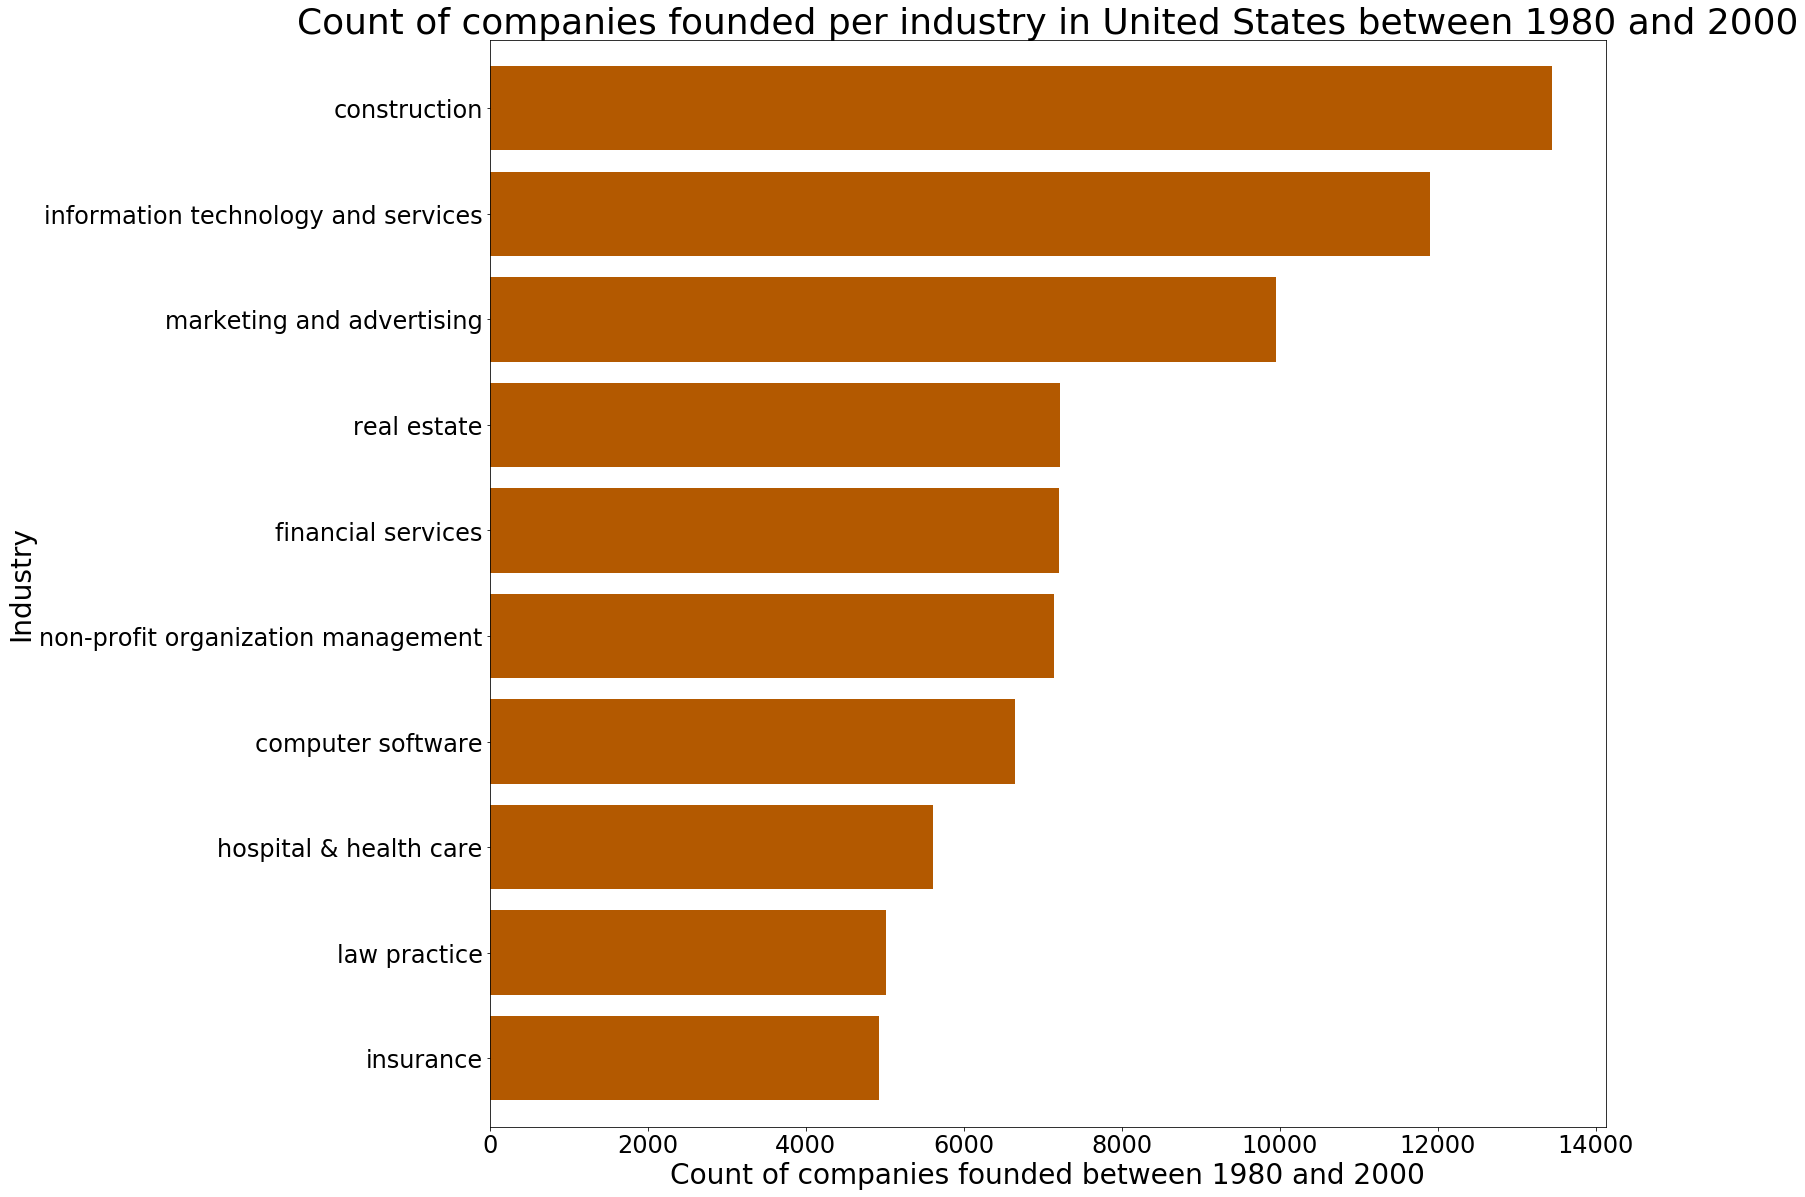

In [133]:
# Realizamos una gráfica de industria vs cantidad de empresas fundadas entre 1980 y 2000 en Estados Unidos
count_per_industry_between_1980_and_2000_in_usa_collect  = count_per_industry_between_1980_and_2000_in_usa.collect()
industry_items = [item[0] for item in count_per_industry_between_1980_and_2000_in_usa_collect]
count_items = [item[1] for item in count_per_industry_between_1980_and_2000_in_usa_collect]
count_per_industry_between_1980_and_2000_in_usa_collect = {"industries" : industry_items, "count": count_items}
count_per_industry_between_1980_and_2000_in_usa_df = pd.DataFrame(count_per_industry_between_1980_and_2000_in_usa_collect)
count_per_industry_between_1980_and_2000_in_usa_df = count_per_industry_between_1980_and_2000_in_usa_df.sort_values(by = "count", ascending  = False)
count_per_industry_between_1980_and_2000_in_usa_df = count_per_industry_between_1980_and_2000_in_usa_df.iloc[:10]

myplot = count_per_industry_between_1980_and_2000_in_usa_df.plot(figsize = (20,20), kind = "barh", color = "#b35900", width = 0.8,
                               x = "industries", y = "count", legend = False)

myplot.invert_yaxis()

plt.xlabel("Count of companies founded between 1980 and 2000", fontsize = 28)
plt.ylabel("Industry", fontsize = 28)
plt.title("Count of companies founded per industry in United States between 1980 and 2000", fontsize = 36)
plt.xticks(size = 24)
plt.yticks(size = 24)
plt.show()

#### Entre 2000 y 2022

In [134]:
count_per_industry_between_2000_and_2022_in_usa = companies.where((companies["year founded"] >= 2000) & (companies["year founded"] <= 20022) & (companies["country"] == "united states")).groupBy("industry").count()

In [135]:
count_per_industry_between_2000_and_2022_in_usa.show()

+--------------------+-----+
|            industry|count|
+--------------------+-----+
|aviation & aerospace| 2035|
|glass, ceramics &...|  244|
|     pharmaceuticals| 3105|
|recreational faci...| 1418|
|     defense & space| 2051|
|     broadcast media| 2847|
|             fishery|  122|
|           utilities| 1320|
|          publishing| 5030|
|          veterinary| 1030|
|         think tanks| 1060|
|          automotive| 6778|
|industrial automa...| 1507|
|packaging and con...|  746|
|        law practice|12211|
|               dairy|   84|
|         warehousing|  349|
|health, wellness ...|23901|
|railroad manufacture|   36|
|           wholesale| 2720|
+--------------------+-----+
only showing top 20 rows



In [136]:
# Calculamos cuántas empresas se crearon para la industria que más empresas creó en Estados Unidos entre 2000 y 2022
count_industry_with_more_companies_founded_between_2000_and_2022_in_usa = count_per_industry_between_2000_and_2022_in_usa.agg({"count" : "max"}).collect()[0][0]

In [137]:
print("La industria que más empresas fundó en Estados Unidos entre 2000 y 2022 fundó {} empresas".format(count_industry_with_more_companies_founded_between_2000_and_2022_in_usa))

La industria que más empresas fundó en Estados Unidos entre 2000 y 2022 fundó 56659 empresas


In [138]:
# Calculamos cual es la industria que más empresas creó entre 2000 y 2022 en Estados Unidos
count_per_industry_between_2000_and_2022_in_usa.where((count_per_industry_between_2000_and_2022_in_usa["count"] == count_industry_with_more_companies_founded_between_2000_and_2022_in_usa)).show()

+--------------------+-----+
|            industry|count|
+--------------------+-----+
|marketing and adv...|56659|
+--------------------+-----+



#### => La industria que más empresas fundó en Estados Unidos entre 2000 y 2022 fue "marketing and advertising"

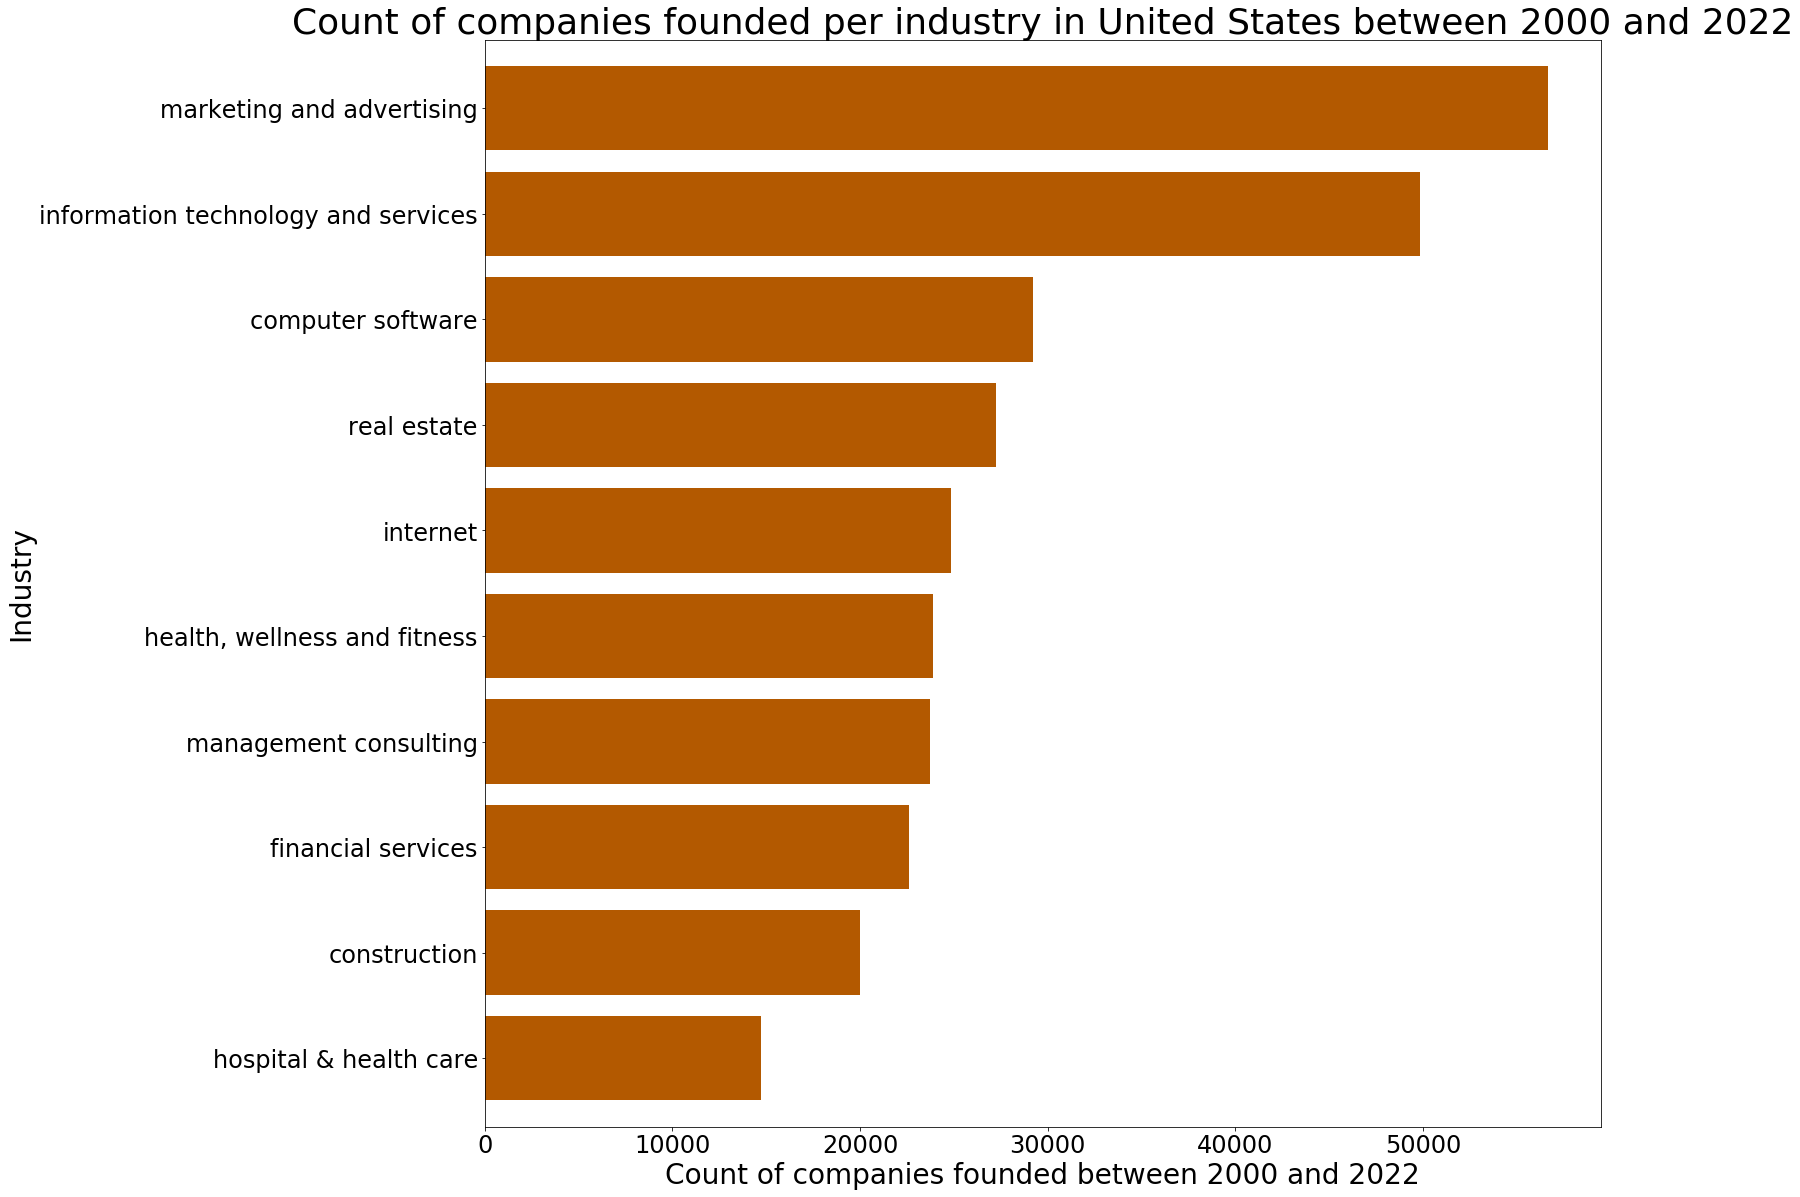

In [139]:
# Realizamos una gráfica de industria vs cantidad de empresas fundadas entre 2000 y 2022 en Estados Unidos
count_per_industry_between_2000_and_2022_in_usa_collect  = count_per_industry_between_2000_and_2022_in_usa.collect()
industry_items = [item[0] for item in count_per_industry_between_2000_and_2022_in_usa_collect]
count_items = [item[1] for item in count_per_industry_between_2000_and_2022_in_usa_collect]
count_per_industry_between_2000_and_2022_in_usa_collect = {"industries" : industry_items, "count": count_items}
count_per_industry_between_2000_and_2022_in_usa_df = pd.DataFrame(count_per_industry_between_2000_and_2022_in_usa_collect)
count_per_industry_between_2000_and_2022_in_usa_df = count_per_industry_between_2000_and_2022_in_usa_df.sort_values(by = "count", ascending  = False)
count_per_industry_between_2000_and_2022_in_usa_df = count_per_industry_between_2000_and_2022_in_usa_df.iloc[:10]

myplot = count_per_industry_between_2000_and_2022_in_usa_df.plot(figsize = (20,20), kind = "barh", color = "#b35900", width = 0.8,
                               x = "industries", y = "count", legend = False)

myplot.invert_yaxis()

plt.xlabel("Count of companies founded between 2000 and 2022", fontsize = 28)
plt.ylabel("Industry", fontsize = 28)
plt.title("Count of companies founded per industry in United States between 2000 and 2022", fontsize = 36)
plt.xticks(size = 24)
plt.yticks(size = 24)
plt.show()